## Star Hotels - Problem Statement

### Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

 

### Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

 

### Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

### Data Dictionary

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)* 
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Importing necessary libraries and data

In [136]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Data Overview

In [137]:
Hotels = pd.read_csv("StarHotelsGroup.csv")

<IPython.core.display.Javascript object>

In [138]:
# copying data to another variable to avoid any changes to original data
data = Hotels.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled

<IPython.core.display.Javascript object>

In [6]:
data.tail()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
56921             2               1                     0                  1   
56922             2               0                     1                  1   
56923             2               0                     0                  3   
56924             2               0                     2                  2   
56925             2               0                     1                  2   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
56921       Meal Plan 2                           0        Room_Type 4   
56922       Meal Plan 1                           0        Room_Type 1   
56923      Not Selected                           0        Room_Type 1   
56924      Not Selected                           0        Room_Type 1   
56925       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
56921         45          2019              6            15   
56922        320          2019              5            15   
56923         63          2018              4            21   
56924          6          2019              4            28   
56925        207          2018             12            30   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
56921              Online               0                             0   
56922             Offline               0                             0   
56923              Online               0                             0   
56924              Online               0                             0   
56925             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
56921                                     0              163.88   
56922                                     0               90.00   
56923                                     0               94.50   
56924                                     0              162.50   
56925                                     0              161.67   

       no_of_special_requests booking_status  
56921                       1   Not_Canceled  
56922                       1       Canceled  
56923                       0       Canceled  
56924                       2   Not_Canceled  
56925                       0   Not_Canceled

<IPython.core.display.Javascript object>

In [7]:
data.shape

(56926, 18)

<IPython.core.display.Javascript object>

In [9]:
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

<IPython.core.display.Javascript object>

In [10]:
data.drop_duplicates(inplace=True)

<IPython.core.display.Javascript object>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42576 non-null  int64  
 1   no_of_children                        42576 non-null  int64  
 2   no_of_weekend_nights                  42576 non-null  int64  
 3   no_of_week_nights                     42576 non-null  int64  
 4   type_of_meal_plan                     42576 non-null  object 
 5   required_car_parking_space            42576 non-null  int64  
 6   room_type_reserved                    42576 non-null  object 
 7   lead_time                             42576 non-null  int64  
 8   arrival_year                          42576 non-null  int64  
 9   arrival_month                         42576 non-null  int64  
 10  arrival_date                          42576 non-null  int64  
 11  market_segment_

<IPython.core.display.Javascript object>

### Insights:

- Most of the datatypes are **int64** and 1 **float64**.
- 4 columns are having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.

### Check for missing values

In [13]:
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Summary of the dataset

In [15]:
data.describe().T

count         mean        std     min  \
no_of_adults                          42576.0     1.916737   0.527524     0.0   
no_of_children                        42576.0     0.142146   0.459920     0.0   
no_of_weekend_nights                  42576.0     0.895270   0.887864     0.0   
no_of_week_nights                     42576.0     2.321167   1.519328     0.0   
required_car_parking_space            42576.0     0.034362   0.182160     0.0   
lead_time                             42576.0    77.315953  77.279616     0.0   
arrival_year                          42576.0  2018.297891   0.626126  2017.0   
arrival_month                         42576.0     6.365488   3.051924     1.0   
arrival_date                          42576.0    15.682873   8.813991     1.0   
repeated_guest                        42576.0     0.030886   0.173011     0.0   
no_of_previous_cancellations          42576.0     0.025413   0.358194     0.0   
no_of_previous_bookings_not_canceled  42576.0     0.222731   2.242308     0.0   
avg_price_per_room                    42576.0   112.375800  40.865896     0.0   
no_of_special_requests                42576.0     0.768109   0.837264     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     8.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               16.0    53.0   118.0   521.0  
arrival_year                          2018.0  2018.0  2019.0  2019.0  
arrival_month                            4.0     6.0     9.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
avg_price_per_room                      85.5   107.0   135.0   540.0  
no_of_special_requests                   0.0     1.0     1.0     5.0

<IPython.core.display.Javascript object>

* All the numerical variables seem to be right-skewed.
* Customers lead time average is 77days, which is on the high side.
* There are some customers who visit the hotel during the week nights compared to weekend nights.
* Year 2019 had the highest number of customers that visited.
* The mean avg_price_per_room is 112.37euros, maximum price is 540euros

In [16]:



data.describe(include=["object"])

type_of_meal_plan room_type_reserved market_segment_type booking_status
count              42576              42576               42576          42576
unique                 4                  7                   5              2
top          Meal Plan 1        Room_Type 1              Online   Not_Canceled
freq               31863              29730               34169          28089

<IPython.core.display.Javascript object>

In [9]:
cat_columns = [
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
**************************************************
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
**************************************************
Online           39490
Offline          13875
Corporate         2796
Complementary      536
Aviation           229
Name: market_segment_type, dtype: int64
**************************************************
Not_Canceled    35378
Canceled        21548
Name: booking_status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

**Insights**

* There are two unique booking status variable; Canceled and Not canceled.
* Most customers prefer meal plan 1, which is Breakfast
* Room_type 1 is the preferred choice for most customers
* The online market segment type had the highest number
* Most customers donot cancel their bookings as the number of Not_canceled out weights canceled.

### EDA

### Univariate analysis

In [6]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

**Explore the variable *no_of_adults***

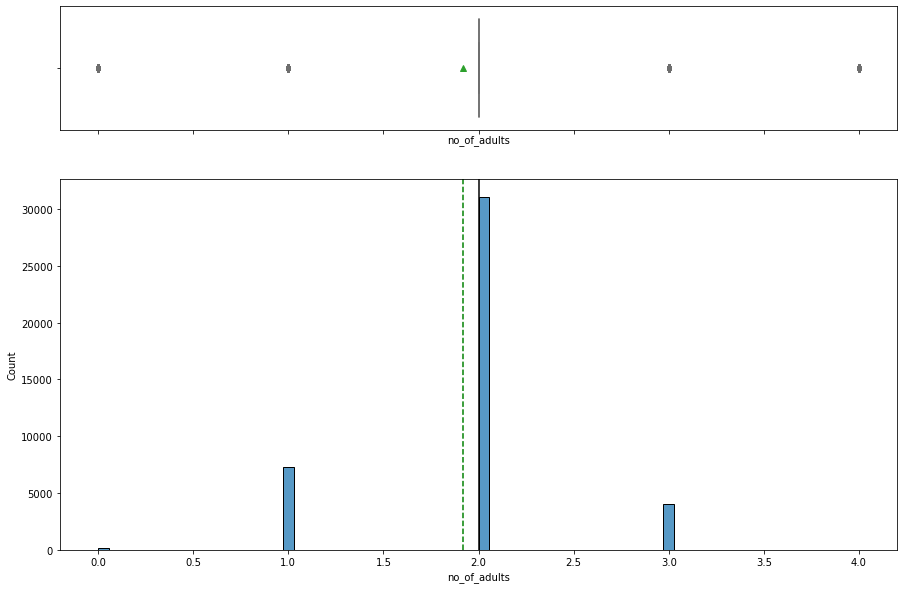

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(data, "no_of_adults", bins=70)

**Observation**
* The median no_of_adults is 2.0
* There are few outliers to the left and right

**Explore the variable *no_of_children***

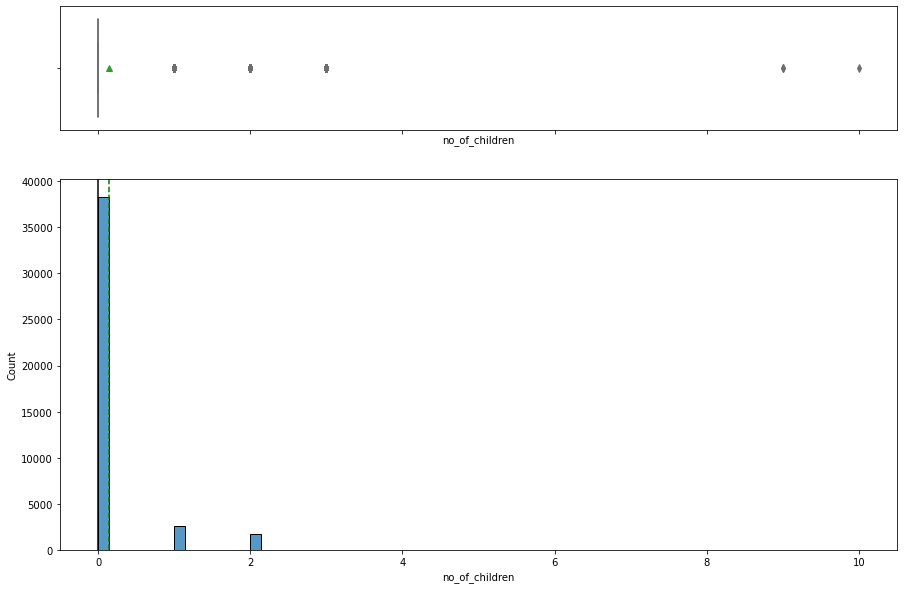

<IPython.core.display.Javascript object>

In [21]:
    histogram_boxplot(data, "no_of_children", bins=70)

**Observation**

* The distribution of no_of_children is right-skewed.
* There are outliers in this variable.
* Very few children have stayed or booked to stay in the hotel.

**Explore the variable *no_of_weekend_nights***

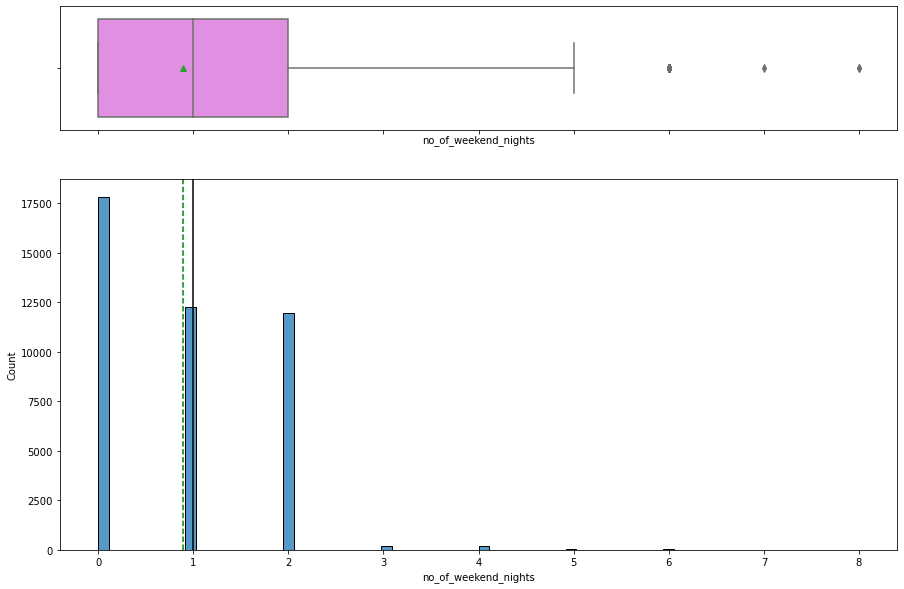

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "no_of_weekend_nights", bins=70)

**Observation**

* The distribution of no_of_children is right-skewed.
* There are outliers to the right.
* The distribution of no_of_weekend_nights suggests that most customers have stayed or booked to stay in the hotel on days which were not close to a special occasion.

**Explore the variable *no_of_week_nights***

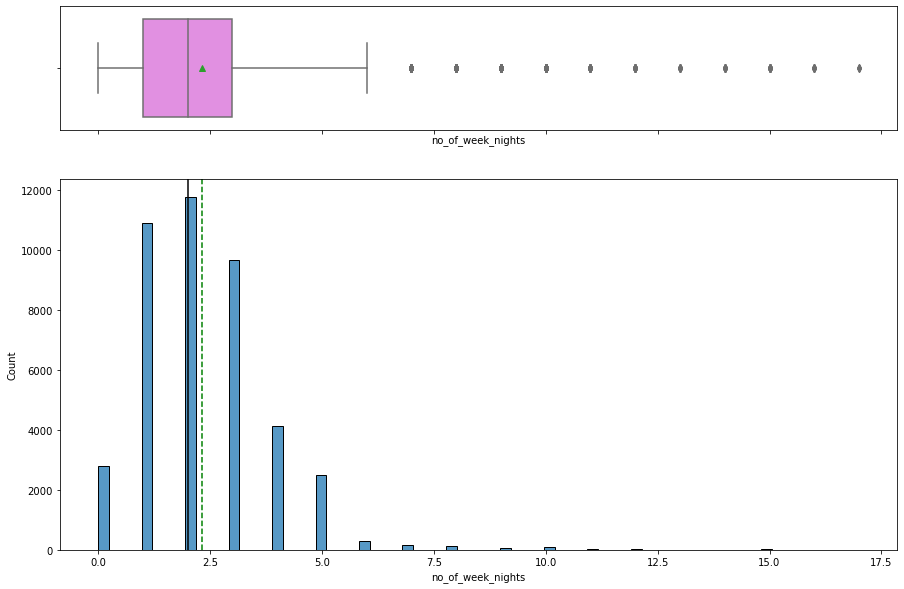

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "no_of_week_nights", bins=70)

*Observation*

* The didtribution of no_of_week_nights shows that customers stayed or booked to stay in the hotel mostly on week nights.
* The distribution of no_of_week nights is right-skewed.
* There are outliers to the right.

**Explore the variable *required_car_parking_space***

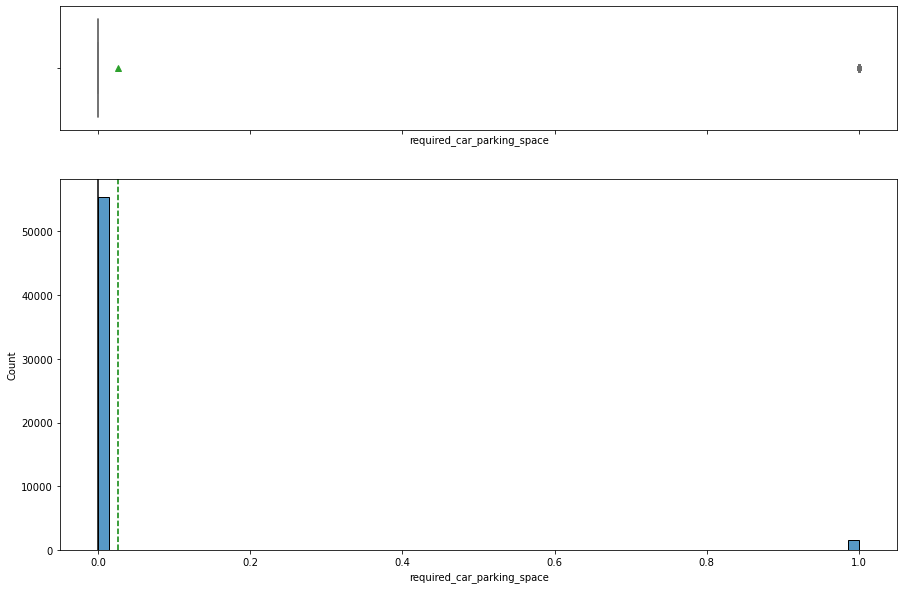

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(data, "required_car_parking_space", bins=70)

*Observation*

* required_car_parking_space is skewd to the right


**Explore the variable *lead_time***

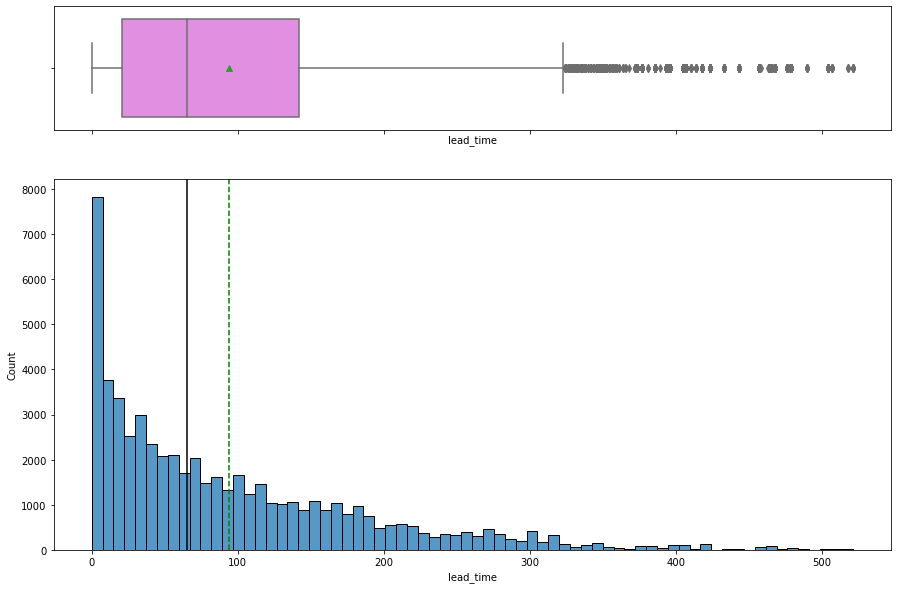

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(data, "lead_time", bins=70)

*Observation*

* The distribution of lead_time is right-skewed.
* There are heavy outliers in this variable.
* On average customers have spent less than 100 days on the lead_time between the date of booking and arrival.

**Explore the variable *arrival_year***

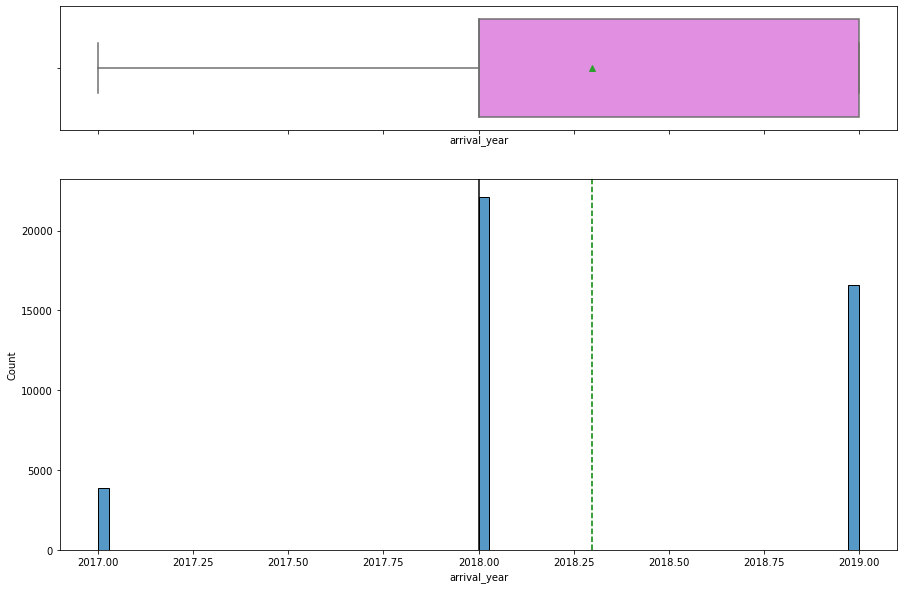

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "arrival_year", bins=70)

*Observation*

* The median arrival_year is 2018
* No outliers

**Explore the variable *arrival_year***

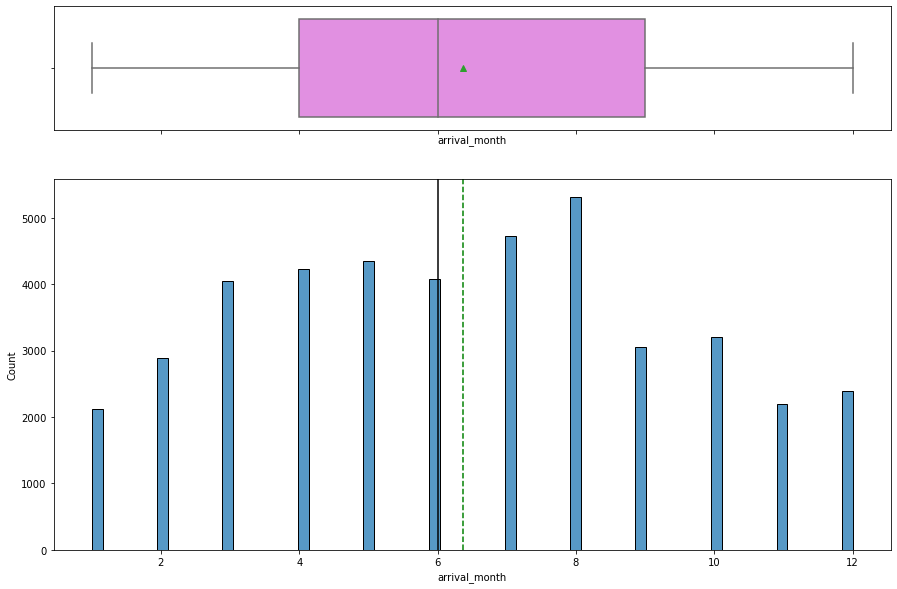

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "arrival_month", bins=70)

*Observation*

* Month 8 had the highest customers that stayed or booked.
* The average arrival month is between month 6 & 7
* There are no outliers

**Explore the variable *arrival_date***

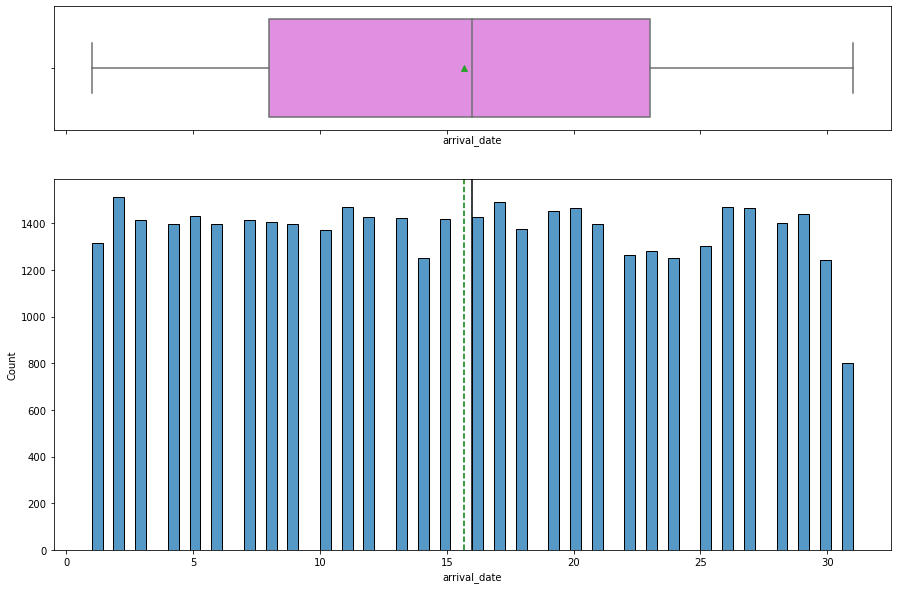

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "arrival_date", bins=70)

*Observation*

* Average arrival date is 16th
* The Maximum arrival date is 2nd
* No outliers

**Explore the variable *repeated_guest***

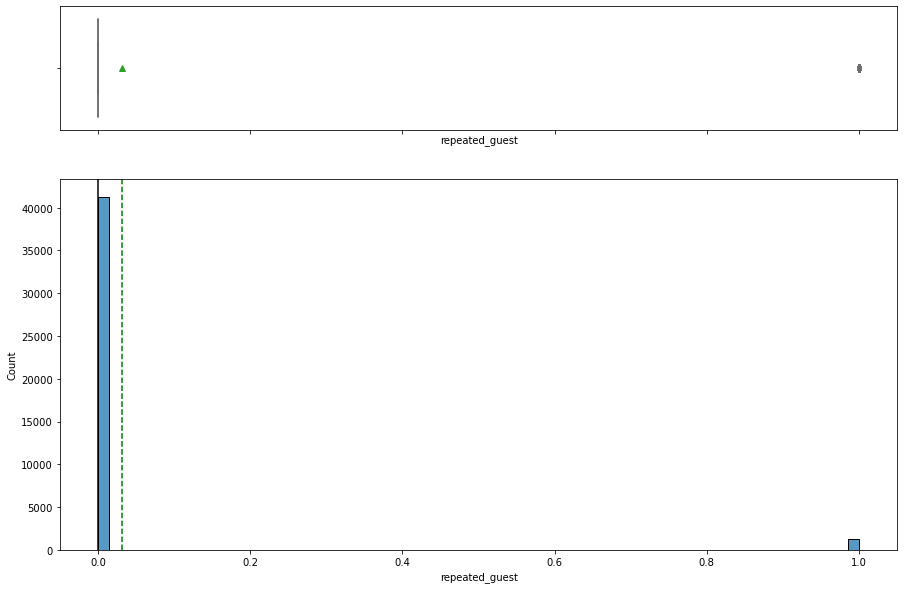

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "repeated_guest", bins=70)

*Observation*

* Repeated guest is skewd to the right
* Average repeated guest is aproximately 0.02


**Explore the variable *no_of_previous_cancellations***

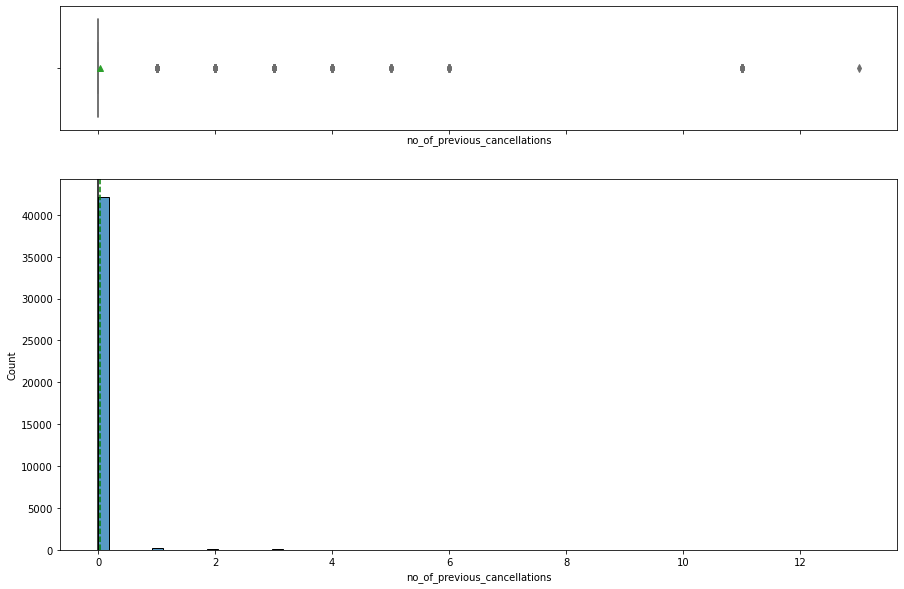

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "no_of_previous_cancellations", bins=70)

*Observation*

* The distribution is highly skwed to the right.
* Heavy Outliers

**Explore the variable *no_of_previous_bookings_not_canceled***

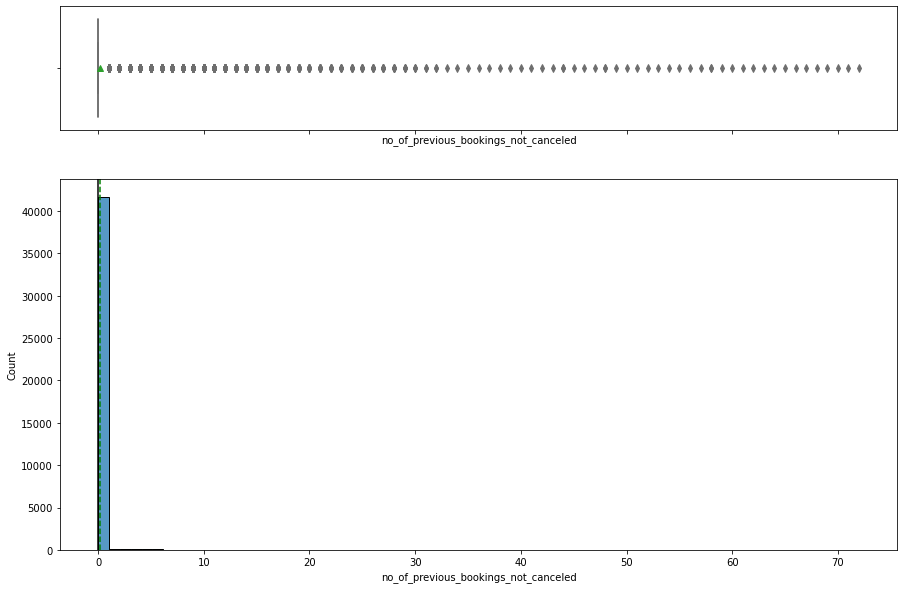

<IPython.core.display.Javascript object>

In [34]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled", bins=70)

*Observation*

* The distribution is highly skwed to the right.
* Heavy Outliers

**Explore the variable *avg_price_per_room***

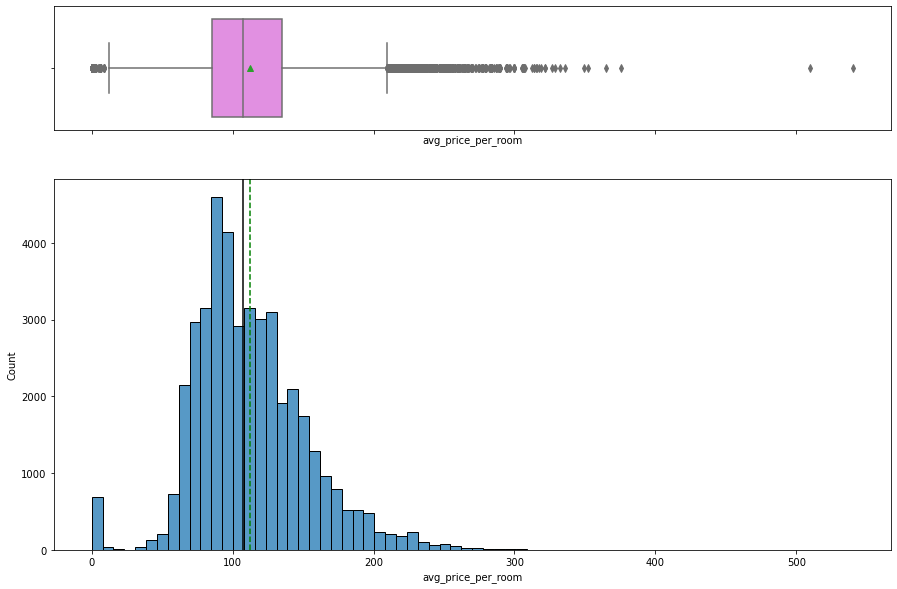

<IPython.core.display.Javascript object>

In [35]:
histogram_boxplot(data, "avg_price_per_room", bins=70)

*Observation*

* The average of the ave_price_per_room is approximately 102euro 
* The median ave_price_per_room is approximatly 101euro
* It is highly skewd to both the left and the right 

**Explore the variable *no_of_special_requests***

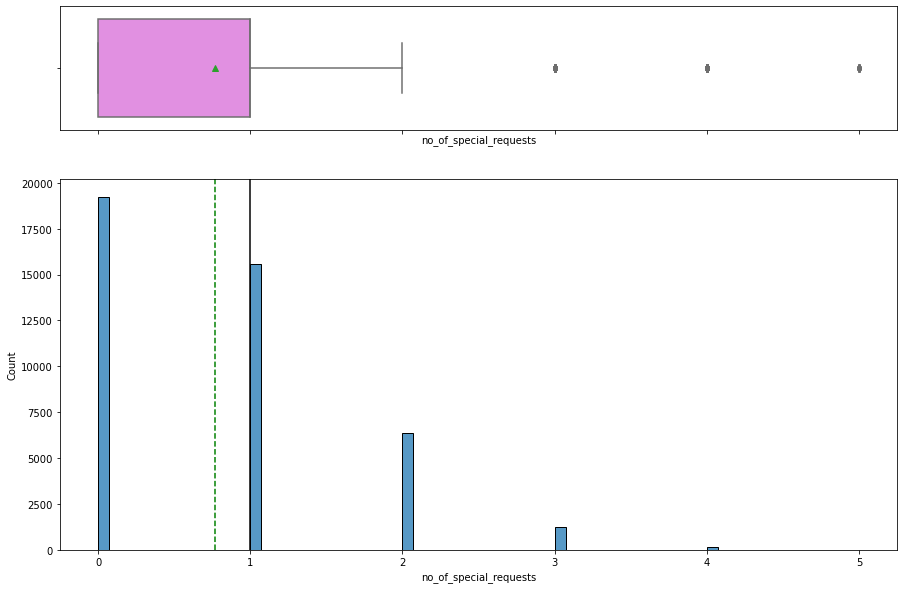

<IPython.core.display.Javascript object>

In [36]:
histogram_boxplot(data, "no_of_special_requests", bins=70)

*Observation*

* Distribution is skwed to the right
* The average no_of_special_requests is approximately 0.8
* The median no_of_special_requests is 1

**Exploring categorical variables**

In [7]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

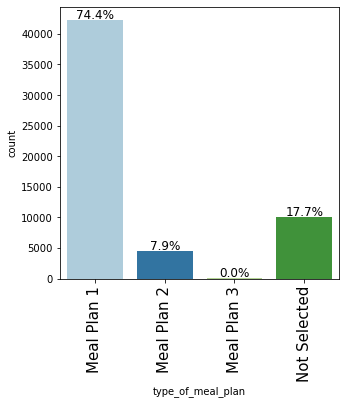

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "type_of_meal_plan", perc=True)


* Observations*

* The most preffered type_of_meal_plan is Meal plan 1 with 74.4%
* The least type_of_meal_plan that was not used at all is Meal plan 3
* People that did not select a meal plan are 17.7%

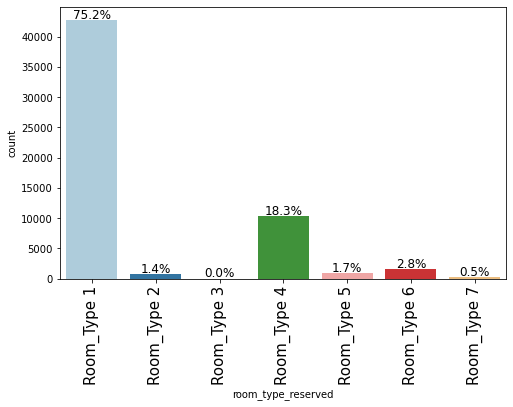

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Observation*

* Room_Type 1 is the most preferred room with 75.2%
* The least used room is Room_Type_3 with 0%
* Room_Type_2 to Room_Type_7 is not up to 50% usage

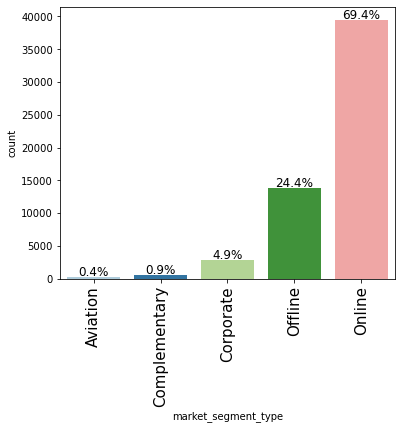

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(data, "market_segment_type", perc=True)

*Observation*

* Online market segment type is the best strategy with 69.4%
* The least market segment type is Aviation with 0.4%
* Aviation, Complementary, Corporate and Offline market segment type did not bring up to 50% yield

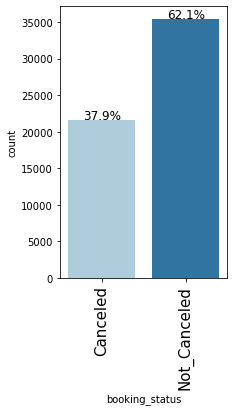

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "booking_status", perc=True)

*Observation*

* The percentage of Not canceled bookings is higher than the percentage of canceled bookings.
* Percentage of canceled bookings is 37.9%.


## Bivariate Analysis

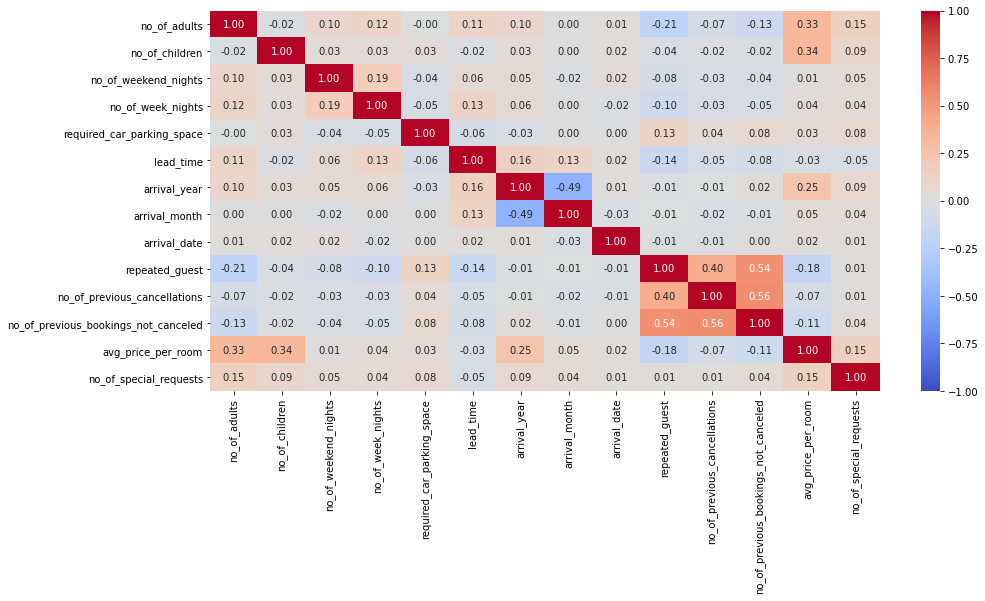

<IPython.core.display.Javascript object>

In [8]:
# Check for correlation among numerical variables
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="coolwarm",
)
plt.show()

**Observations**

* *repeated_guest* is highly positively correlated with *no_of_previous_bookings_not_canceled* and *no_of_previous_cancellations* this means that as guest return back to the hotel they make use of their previous bookings and previous cancellations.
* *no_of_previous_bookings_not_canceled* is highly positively correlated with *no_of_previous_cancellations* this means number of previous cancellation is from the number of previous bookings made. are 
* *no_ of_adults*, *no_of_children* and *arrival_year* is positively correlated with avg_price_per_room, this means avg_price_per_room is dependent on no_of_adults, no_of_children and the arrival year.
* *repeated_guest*,*no_of_previous_bookings_not_canceled* and *no_of_previous_cancellations* are negatively correlated with avg_price_per_room, this means as no of previous cancelation increases, avg.price per room decreases.

### Bivariate Scatter Plots

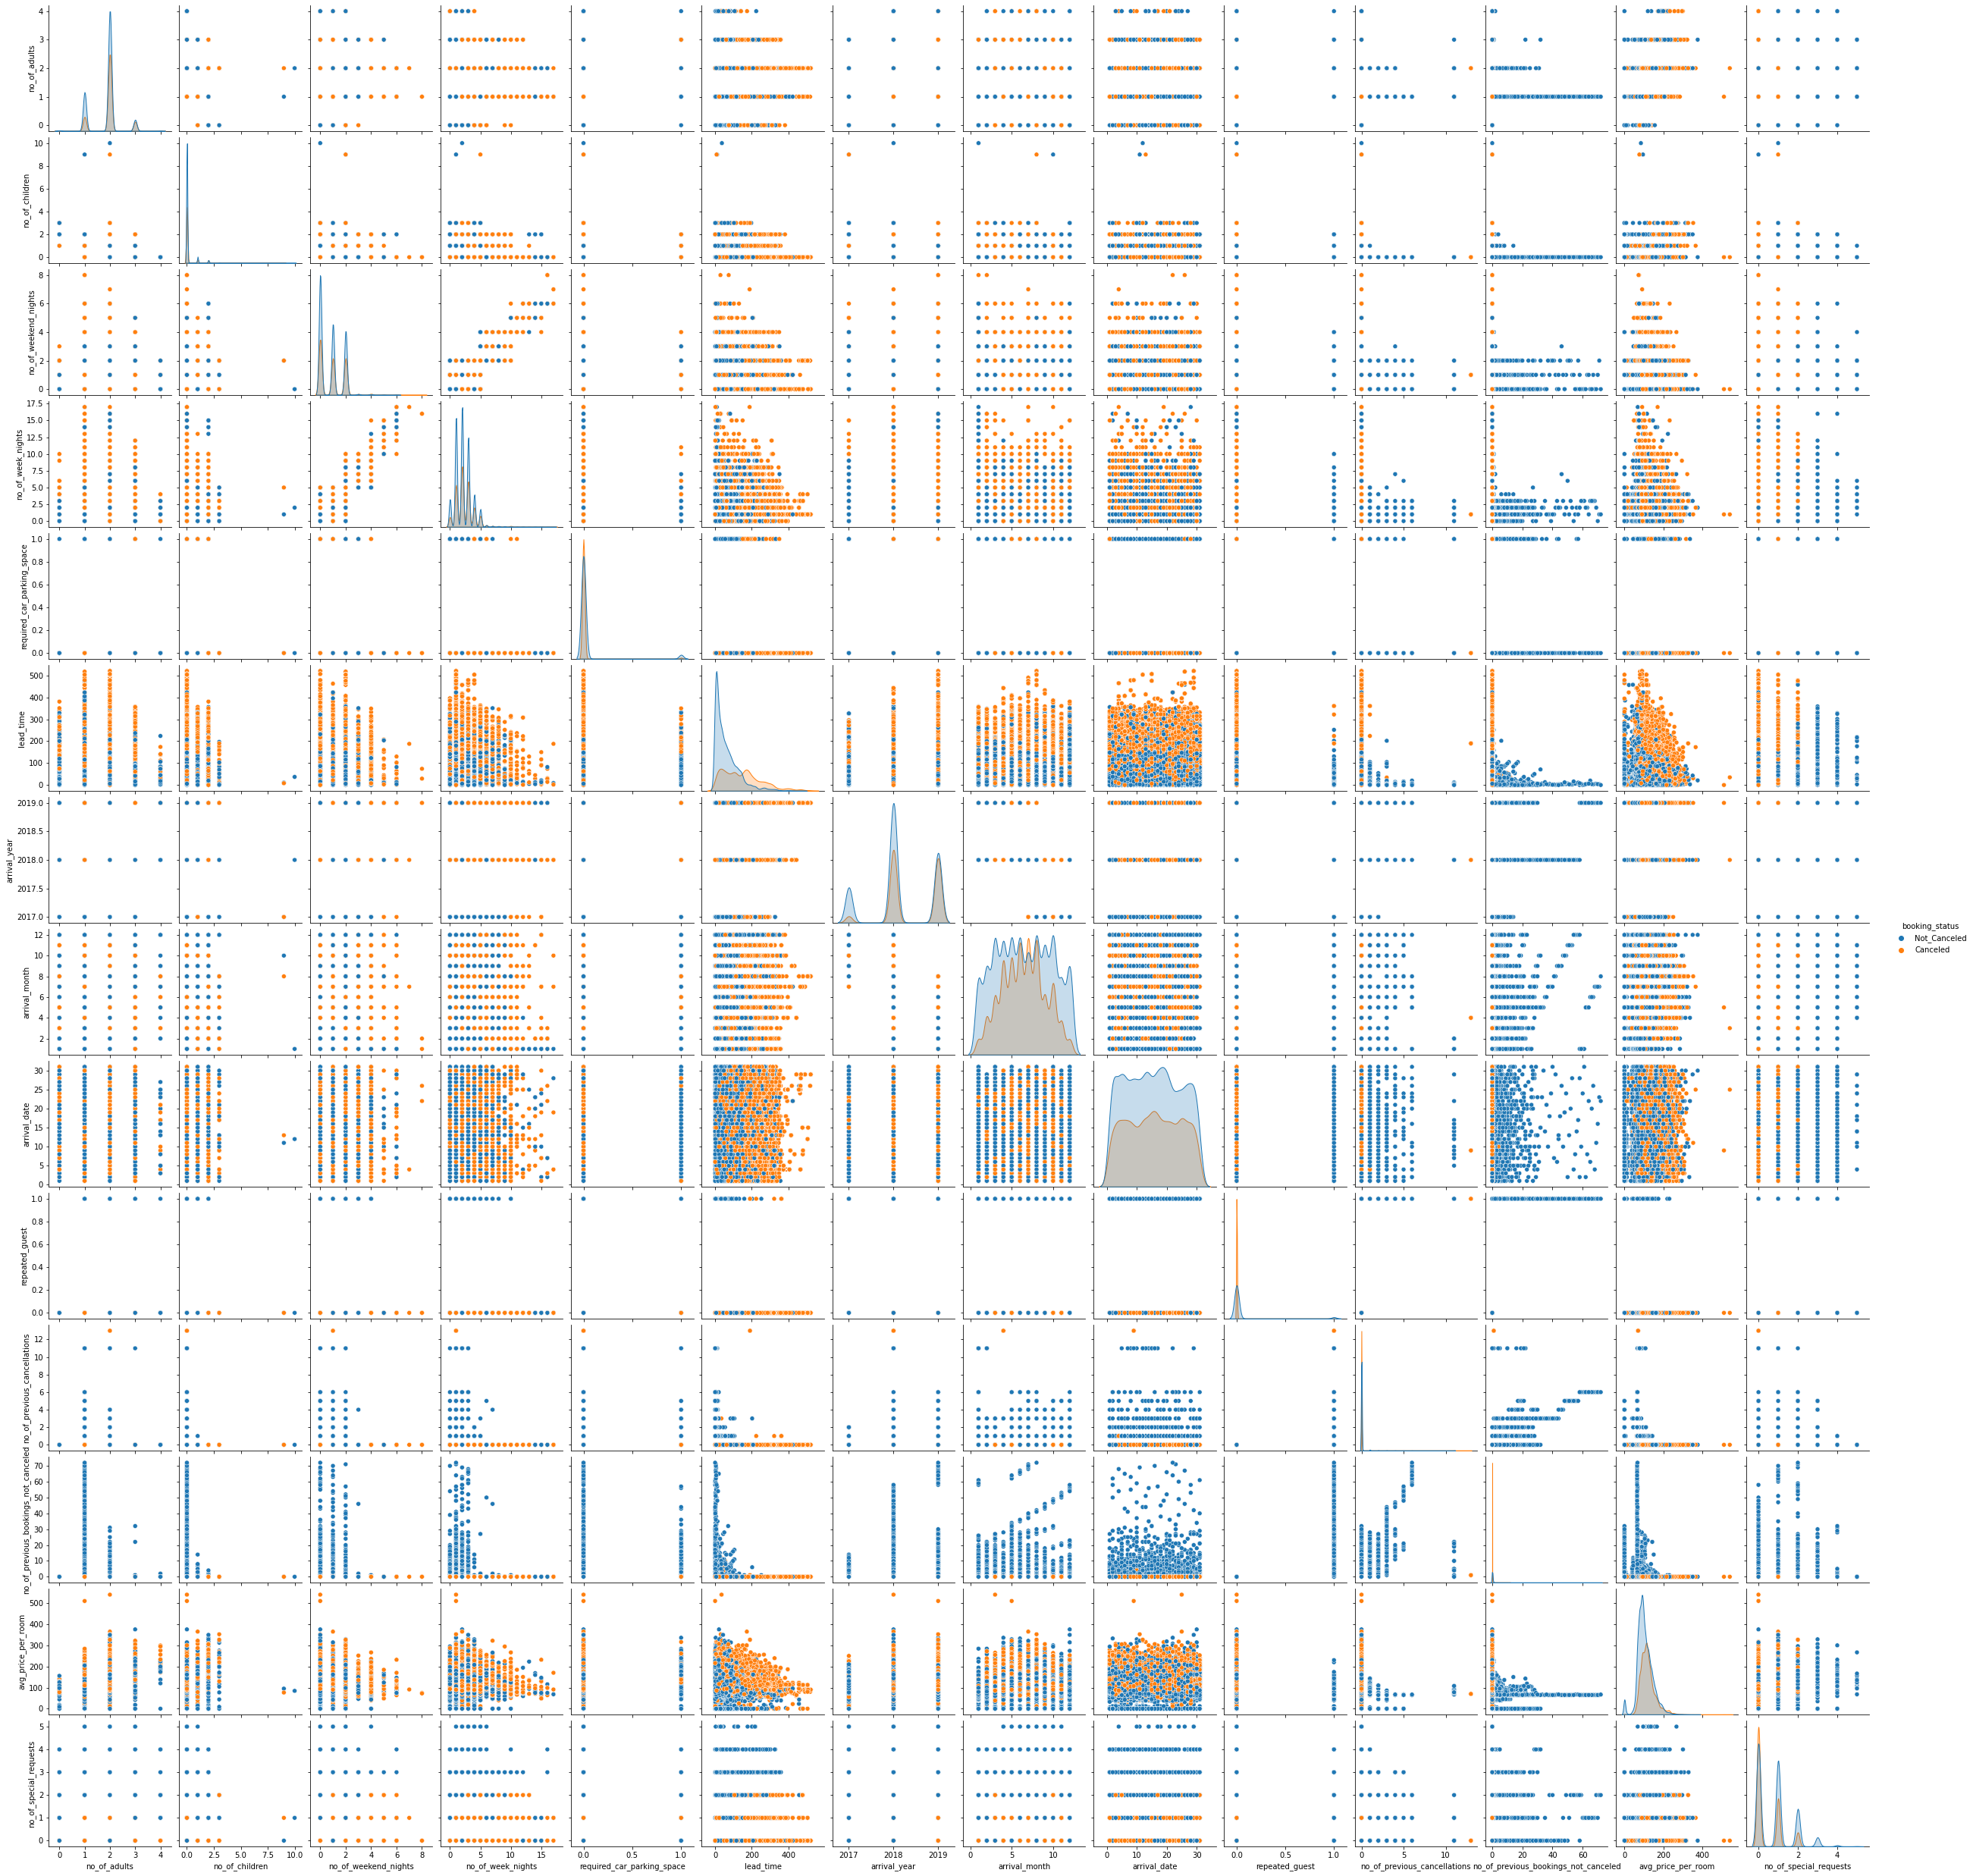

<IPython.core.display.Javascript object>

In [13]:
sns.pairplot(data=data, hue="booking_status")
plt.show()


* We can see varying distributions in variables for revenue, we should investigate it further.

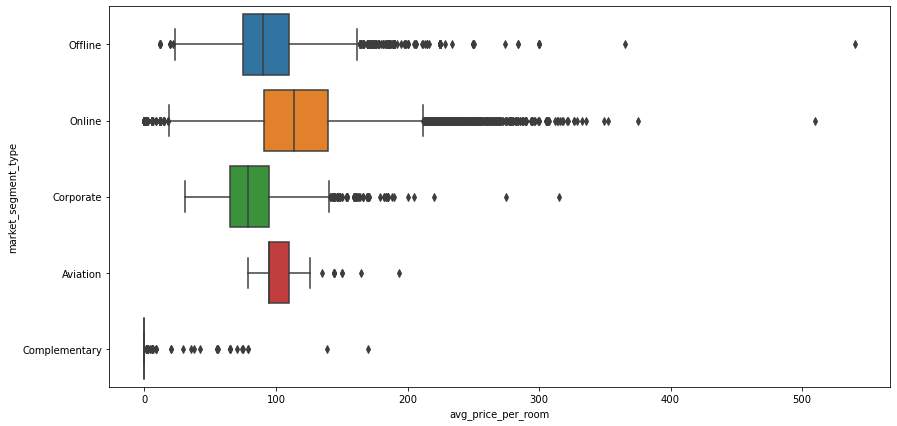

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(14, 7))
sns.boxplot(data["avg_price_per_room"], data["market_segment_type"])
plt.ylabel("market_segment_type")
plt.xlabel("avg_price_per_room")
plt.show()

*Observation*

* All five market segment types are skwed to the right 
* They are have heavy outliers
* Offline market segment type had the highest average price per room of above 500euro

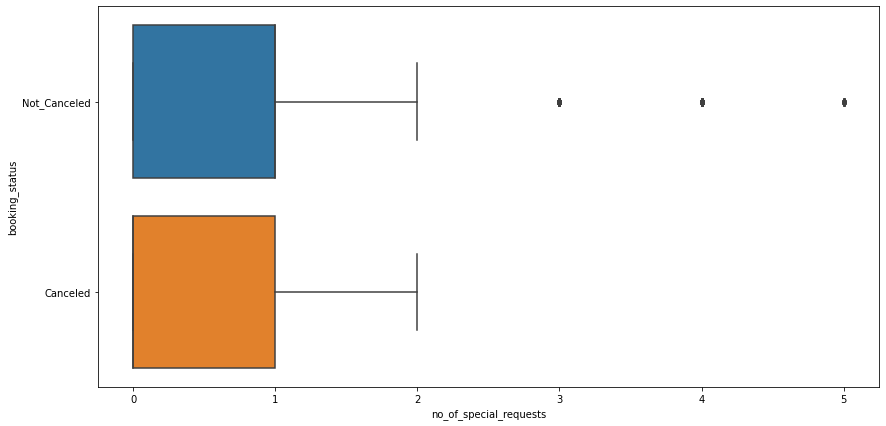

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(14, 7))
sns.boxplot(data["no_of_special_requests"], data["booking_status"])
plt.ylabel("booking_status")
plt.xlabel("no_of_special_requests")
plt.show()

*Observation*
* Booking status Not_canceled is affected by no_of_special_request.
* There are outliers skwed to the right.

### QUESTIONS:

1. What are the busiest months in the hotel? 

Ans: August is the busiest month

2. Which market segment do most of the guests come from?

Ans: Online market segment

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

Ans:

i. Offline market segment type had a price above 500euros

ii. Online market segment type had a price of 500euros

iii. Corporate market segment type had a price of approximately 310euros

iv. Aviation market segment had a price of 200euros

v. Complementary segment market type had a price of approximately 180euros

4. What percentage of bookings are canceled? 

Ans: 37.9% of bookings are canceled

5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel? 

Ans:Approximately 0% of repeated guest cancelled their previous bookings.

6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation? 

Ans:No,special requirements does not affect booking cancellation.


### Detecting & treating of outliers

### booking status vs  no of adults,no of children, no of weekend nights and no of week nights

In [ ]:
cols = data[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

**It is difficult to make an interpretation from the graphs above I will visualize them by removing the outliers (for visualization not from orignal data) to get a better understanding**

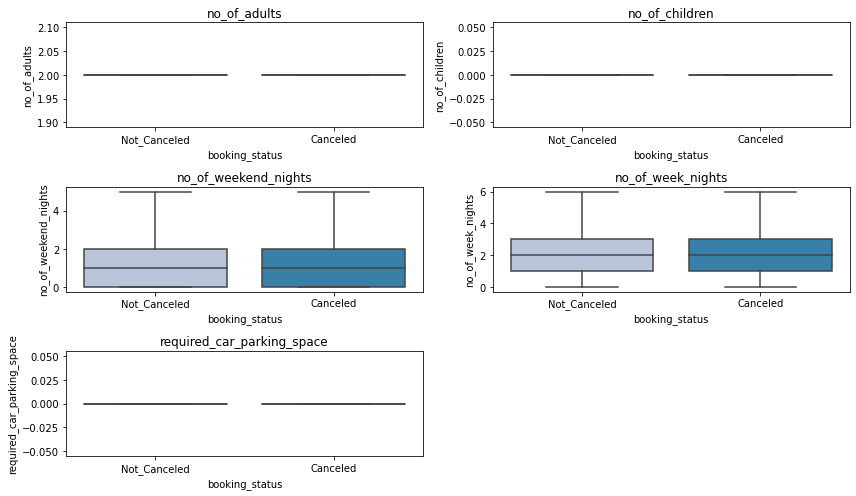

<IPython.core.display.Javascript object>

In [140]:
cols = data[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data["booking_status"], data[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

### booking status vs lead_time, arrival_year, arrival_month, arrival_date, repeated_guest

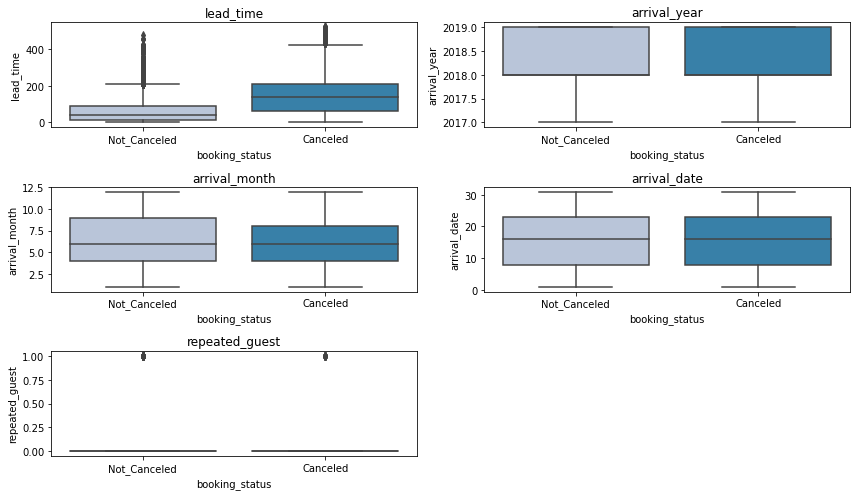

<IPython.core.display.Javascript object>

In [141]:
cols = data[
    ["lead_time", "arrival_year", "arrival_month", "arrival_date", "repeated_guest",]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Removing outliers;

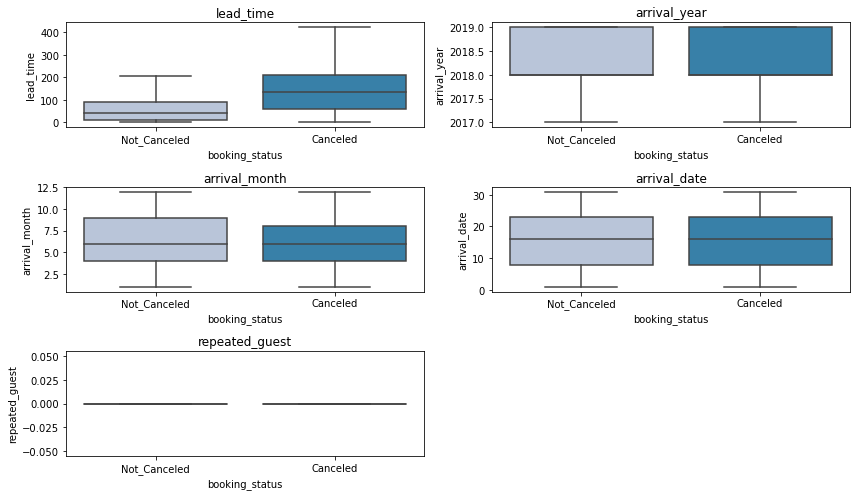

<IPython.core.display.Javascript object>

In [142]:
cols = data[
    ["lead_time", "arrival_year", "arrival_month", "arrival_date", "repeated_guest",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data["booking_status"], data[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

*Observations*

* The lead time of canceled bookings takes a longer time, before customers repeat their bookings.
* The arrival date and year is same for both customers that canceled and didnot cancel their bookings but there is slight difference in the months as there were more customers in some of the months.
* No repeated guest had canceled or Not canceled bookings

### booking status vs no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests

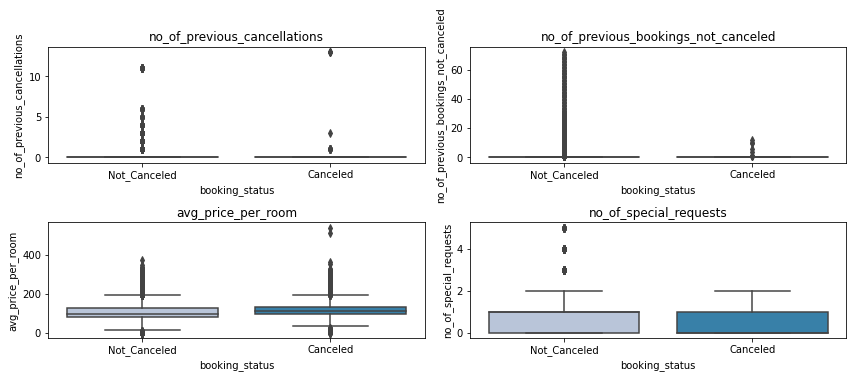

<IPython.core.display.Javascript object>

In [143]:
cols = data[
    [
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data["booking_status"], data[variable], palette="PuBu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Removing outliers

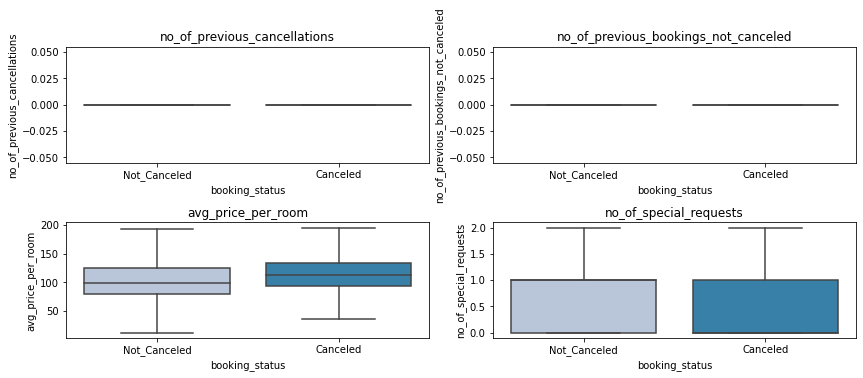

<IPython.core.display.Javascript object>

In [144]:
cols = data[
    [
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data["booking_status"], data[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

* Observations*

* Number of previous cancellation compared to booking status was zero
* Number of previous bookings not canceled compared to booking status is zero
* Avg. price per room  for canceled booking is slightly higher than Not canceled bookings.
* Both canceled and Not canceled bookings had same number of special request.

In [81]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                21548         35378  56926
2                  16474         24927  41401
1                   3013          8008  11021
3                   1968          2314   4282
0                     81           112    193
4                     12            17     29
------------------------------------------------------------------------------------------------------------------------


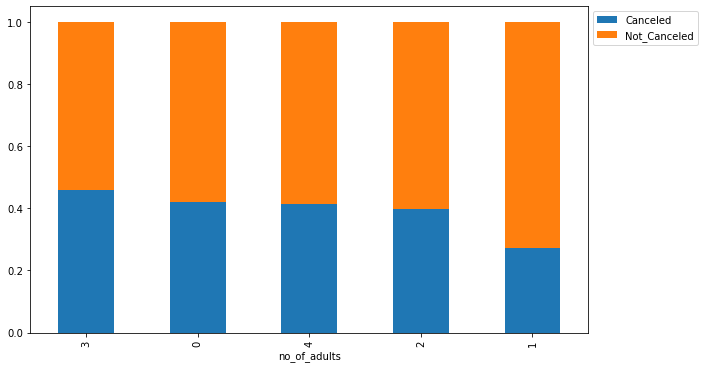

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(data, "no_of_adults", "booking_status")

* Most adults donot cancel their bookings

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                21548         35378  56926
0                  19513         32933  52446
1                   1105          1615   2720
2                    913           803   1716
3                     16            25     41
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


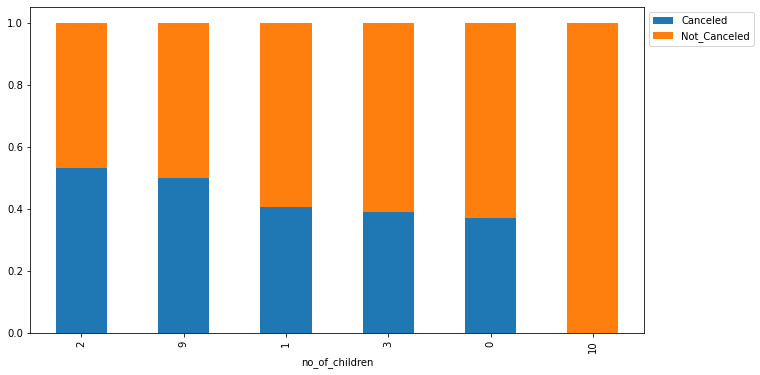

<IPython.core.display.Javascript object>

In [28]:
stacked_barplot(data, "no_of_children", "booking_status")

* As the number of children increases, the more they didnot cancel their bookings.

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      21548         35378  56926
0                         9161         16557  25718
1                         6033          9775  15808
2                         6009          8841  14850
4                          161            72    233
3                          129           113    242
5                           31             9     40
6                           21            11     32
8                            2             0      2
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


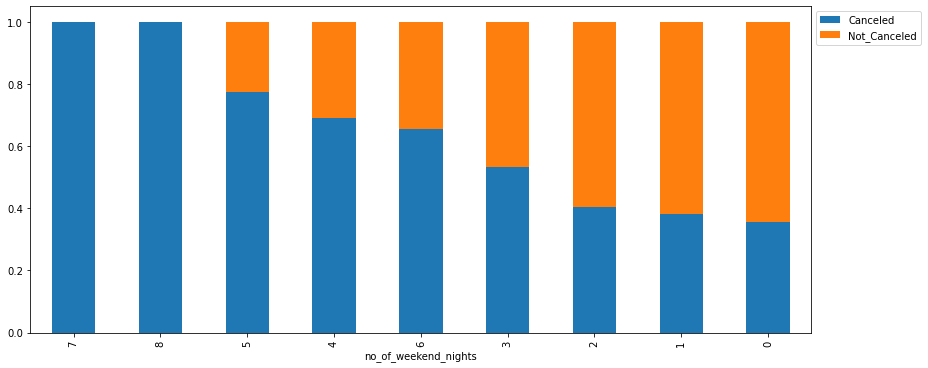

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

* There is a varying pattern of bookings among customers, although number of weekend nights from Not canceled had the highest number.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   21548         35378  56926
2                      6762         10604  17366
3                      5108          7859  12967
1                      4662          9731  14393
4                      2175          2824   4999
5                      1228          1560   2788
0                      1085          2462   3547
6                       172           152    324
7                        97            77    174
10                       93            15    108
8                        78            48    126
9                        31            21     52
11                       17             3     20
12                       12             6     18
15                        9             6     15
13                        7             2      9
14                        5             5     10
16                        5             2      7
17                  

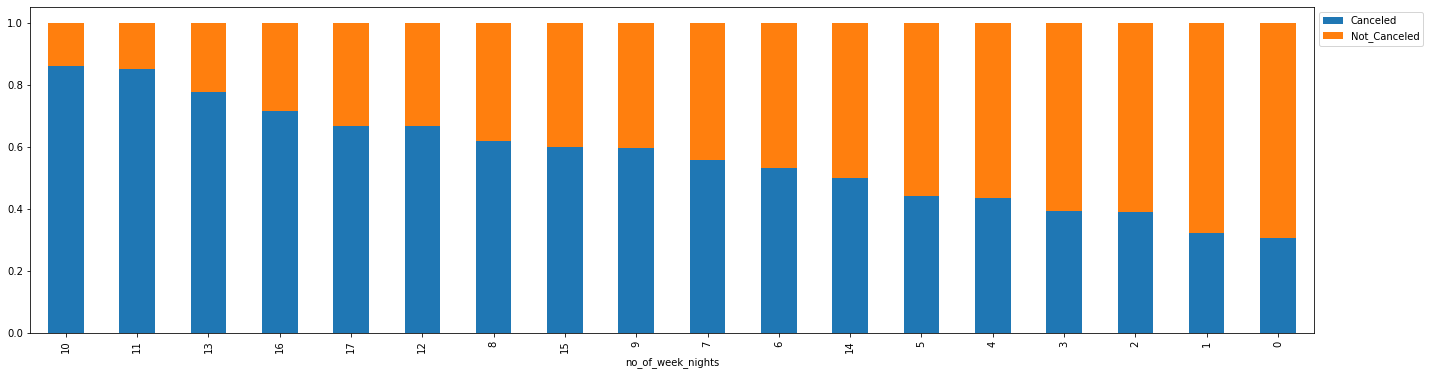

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

* There is no difference in weeknights and weekend nights bookings among customers, pattern is same.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   21548         35378  56926
Meal Plan 1           15547         26783  42330
Not Selected           3793          6279  10072
Meal Plan 2            2207          2309   4516
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


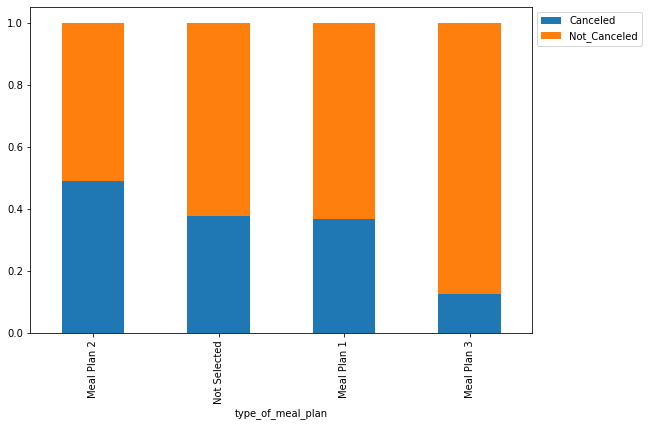

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

* Meal plan 2 had more cancelations amongst all, while plan 3 is the most preferred meal plan,the number of customers that did not cancel their bookings is still high.

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            21548         35378  56926
0                              21362         34065  55427
1                                186          1313   1499
------------------------------------------------------------------------------------------------------------------------


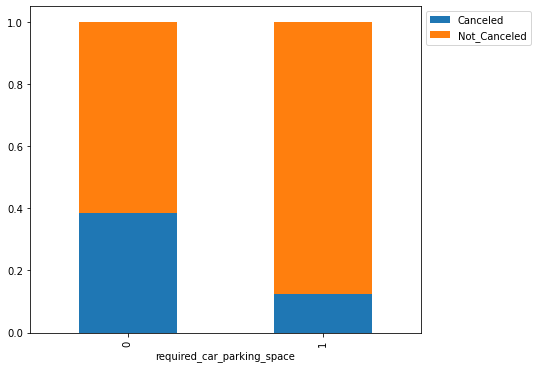

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* Customers that donot require car pack space are the ones that canceled their bookings more than those that required car park space, the number of Not canceled is still higher than canceled.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    21548         35378  56926
Room_Type 1            15651         27156  42807
Room_Type 4             4206          6207  10413
Room_Type 6              856           725   1581
Room_Type 5              408           575    983
Room_Type 2              311           512    823
Room_Type 7              114           198    312
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


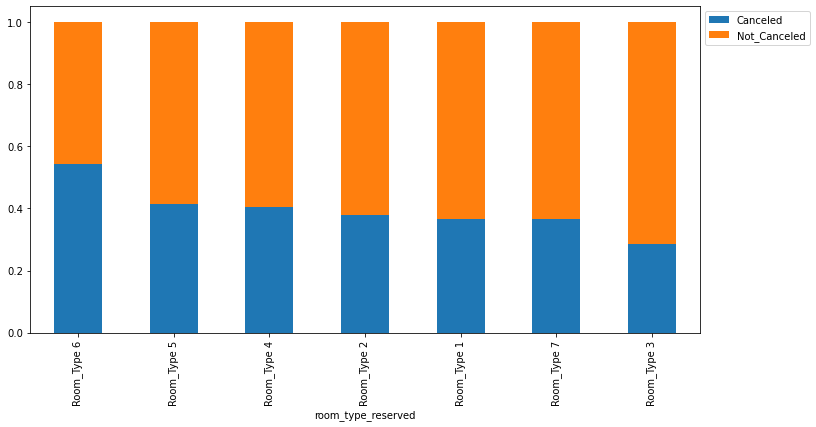

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(data, "room_type_reserved", "booking_status")

* Room type 6 made people to cancel their booking but in allmost customers did not cancel their bookings.

booking_status  Canceled  Not_Canceled    All
lead_time                                    
All                21548         35378  56926
105                  198            90    288
38                   196           180    376
69                   170           138    308
169                  163            26    189
...                  ...           ...    ...
463                    1             0      1
366                    1             0      1
368                    1             0      1
365                    1             0      1
458                    0             1      1

[398 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


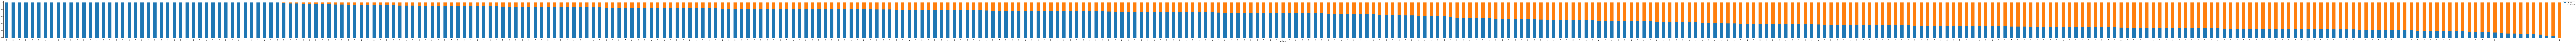

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(data, "lead_time", "booking_status")

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                21548         35378  56926
2018               10924         18837  29761
2019                9663         10988  20651
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


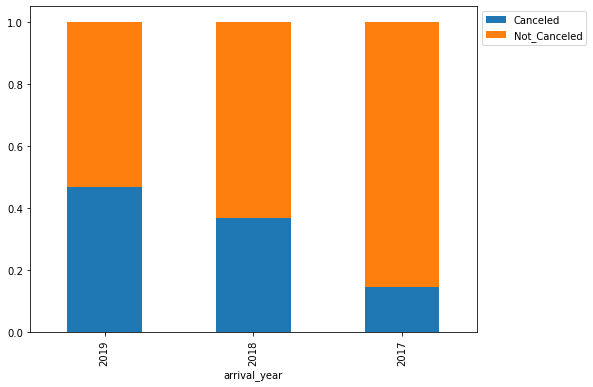

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(data, "arrival_year", "booking_status")

* Year 2019 had the highest cancelation, while Yr 2017 was the best year.

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                21548         35378  56926
7                   3024          2846   5870
8                   2998          3404   6402
6                   2912          3326   6238
5                   2517          3315   5832
4                   2462          3202   5664
10                  1880          3437   5317
9                   1538          3073   4611
3                   1536          3336   4872
2                    999          2477   3476
11                   875          2105   2980
1                    405          2238   2643
12                   402          2619   3021
------------------------------------------------------------------------------------------------------------------------


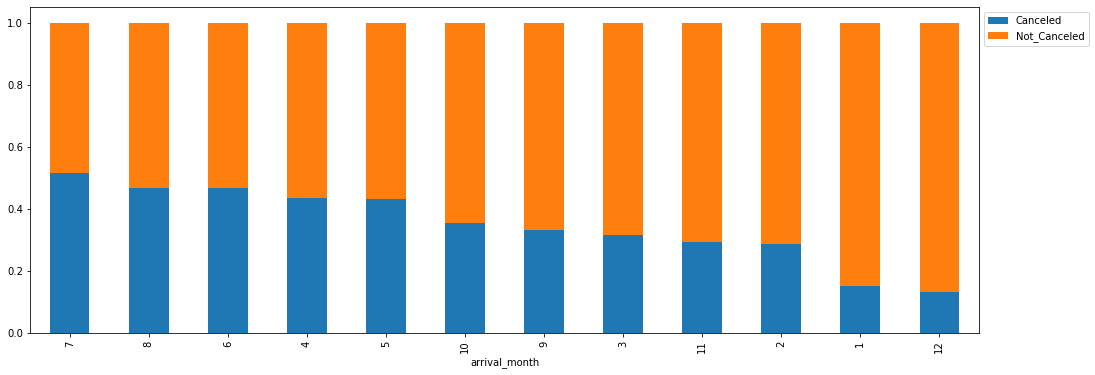

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(data, "arrival_month", "booking_status")

* Cancelations are more from month 4 to 8, while more 12 had the least cancelation as that is a holiday season for both adults and children.

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                21548         35378  56926
15                   889          1095   1984
17                   847          1281   2128
25                   845          1012   1857
16                   806          1191   1997
4                    788          1188   1976
6                    788          1243   2031
12                   772          1115   1887
8                    760          1144   1904
13                   755          1305   2060
28                   740          1069   1809
19                   726          1341   2067
22                   721           963   1684
1                    716           979   1695
21                   707          1175   1882
26                   705          1070   1775
3                    694          1075   1769
20                   690          1245   1935
24                   684          1062   1746
14                   678          

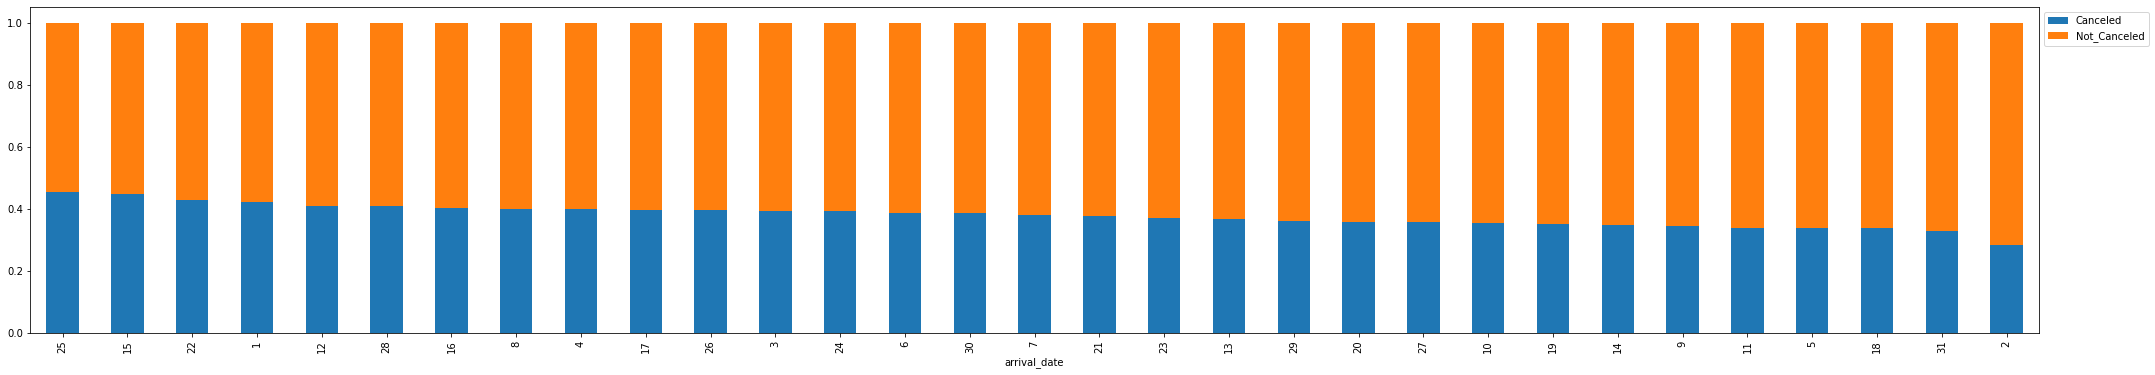

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "arrival_date", "booking_status")

* Arrival date for canceled booking is earlier than those not canceled. 

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     21548         35378  56926
Online                  16524         22966  39490
Offline                  4538          9337  13875
Corporate                 437          2359   2796
Aviation                   49           180    229
Complementary               0           536    536
------------------------------------------------------------------------------------------------------------------------


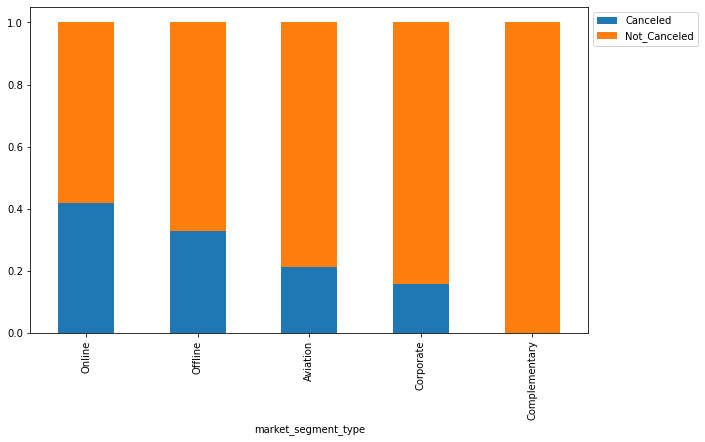

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(data, "market_segment_type", "booking_status")

* There are more cancelations on Online market segment followed by Offline market segment. The best market segment without cancelation is the complementary market segment.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                21548         35378  56926
0                  21530         33992  55522
1                     18          1386   1404
------------------------------------------------------------------------------------------------------------------------


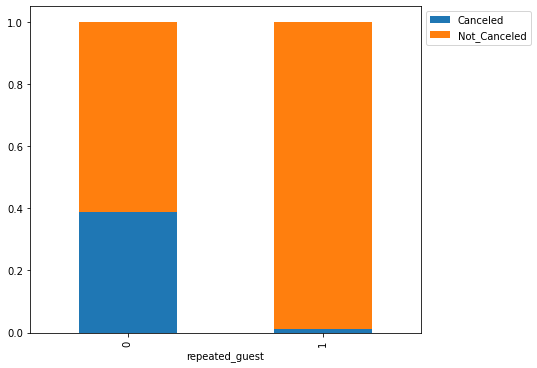

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "repeated_guest", "booking_status")

* Almost all cancelations come from new customers who have not repeated. All repeated guest has a cancelation of approximatelty zero.

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              21548         35378  56926
0                                21530         34881  56411
1                                   13           303    316
13                                   4             0      4
3                                    1            46     47
2                                    0            66     66
4                                    0            25     25
5                                    0            16     16
6                                    0            16     16
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


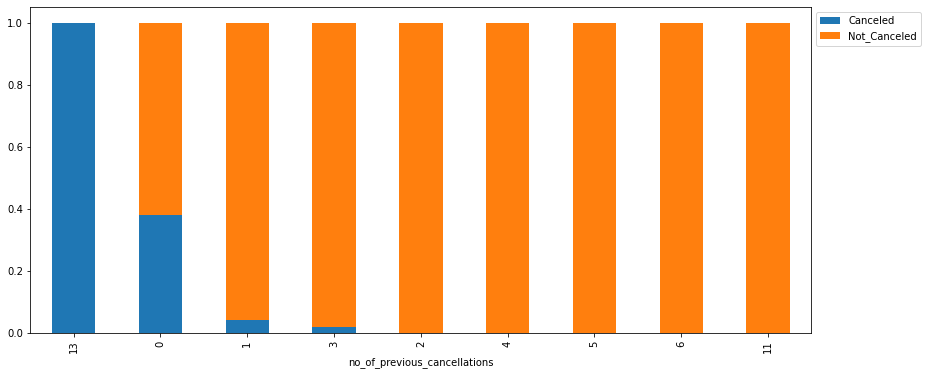

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

* Previous cancelation bookings is very small compared to not canceled bookings.

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      21548         35378  56926
0                                        21539         34102  55641
1                                            4           353    357
10                                           2            31     33
12                                           1            24     25
4                                            1            89     90
6                                            1            53     54
49                                           0             1      1
55                                           0             1      1
54                                           0             1      1
53                                           0             1      1
52                                           0             1      1
51                                           0  

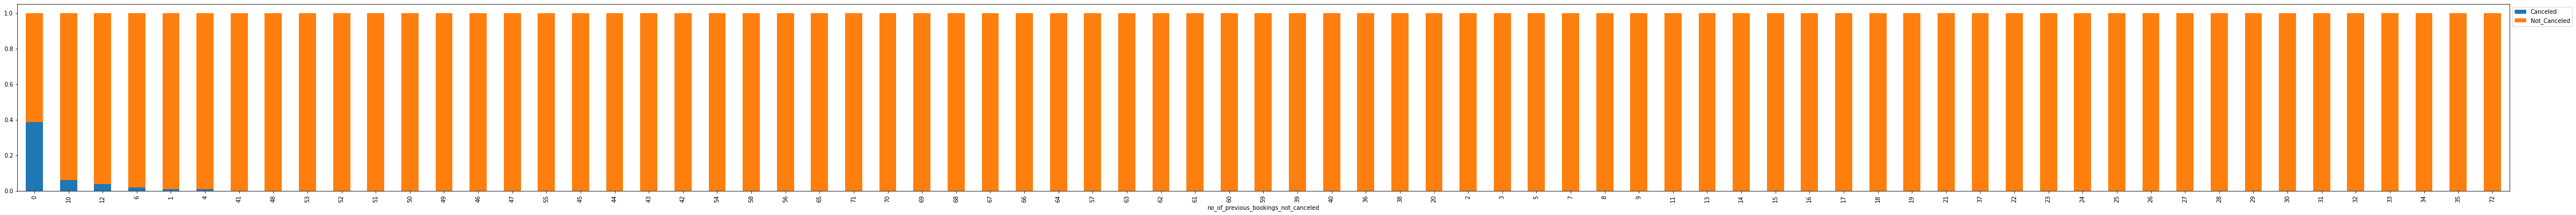

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "no_of_previous_bookings_not_canceled", "booking_status")

* Almost all bookings done previously were not canceled.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        21548         35378  56926
0                          14184         15390  29574
1                           5703         12837  18540
2                           1661          5607   7268
3                              0          1356   1356
4                              0           169    169
5                              0            19     19
------------------------------------------------------------------------------------------------------------------------


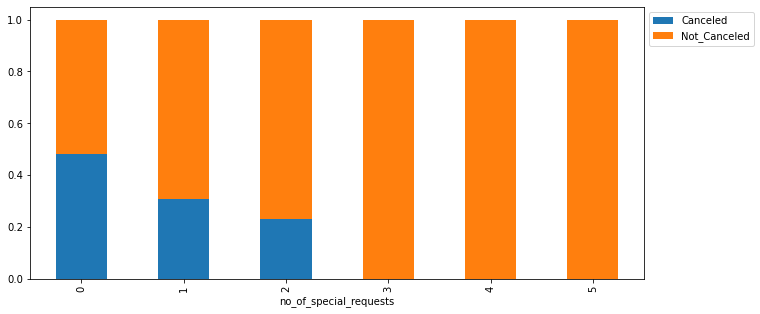

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* Only a few customers canceled their bookings with respect to special request.All others are good.

### Customer-Level Analysis

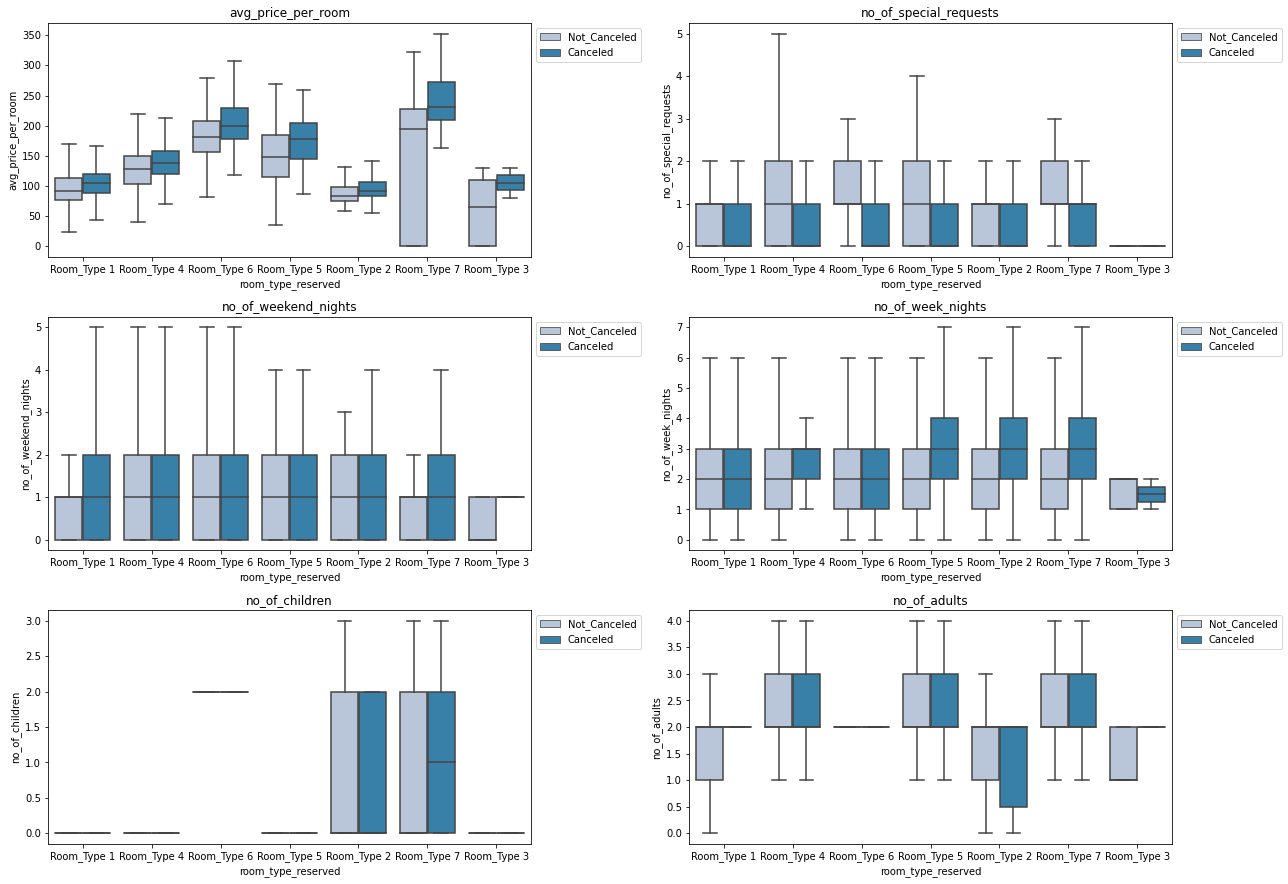

<IPython.core.display.Javascript object>

In [80]:
cols = data[
    [
        "avg_price_per_room",
        "no_of_special_requests",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "no_of_children",
        "no_of_adults",
    ]
].columns.tolist()
plt.figure(figsize=(18, 16))

for i, variable in enumerate(cols):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(
        data["room_type_reserved"],
        data[variable],
        hue=data["booking_status"],
        palette="PuBu",
        showfliers=False,  # turning-off outliers
    )
    plt.tight_layout()
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.title(variable)
plt.show()

* Average price on room type have made customers not to cancel their bookings.This means the room prices are moderate.
* Room type 3 does not need special request as it is well positioned
* All customers that booked for room type 3 during the weekend did not cancel their bookings
* During the week nights room type 5,2,7,and 3 that was booked was not canceled. 
* Children prefer Room type 2 and 7
* Room type 1 and 3 booked by adults were not canceled. Only room type 2 had a high cancelation.


room_type_reserved  Room_Type 1  Room_Type 2  Room_Type 3  Room_Type 4  \
arrival_month                                                            
All                       42807          823            7        10413   
10                         4210           71            3          855   
12                         2309           97            2          473   
6                          4813           41            1         1096   
11                         2492           31            1          393   
1                          2160           64            0          311   
2                          2706           61            0          530   
3                          3598           77            0          969   
4                          4089           72            0         1143   
5                          4116           41            0         1340   
7                          4162          110            0         1242   
8                          4522       

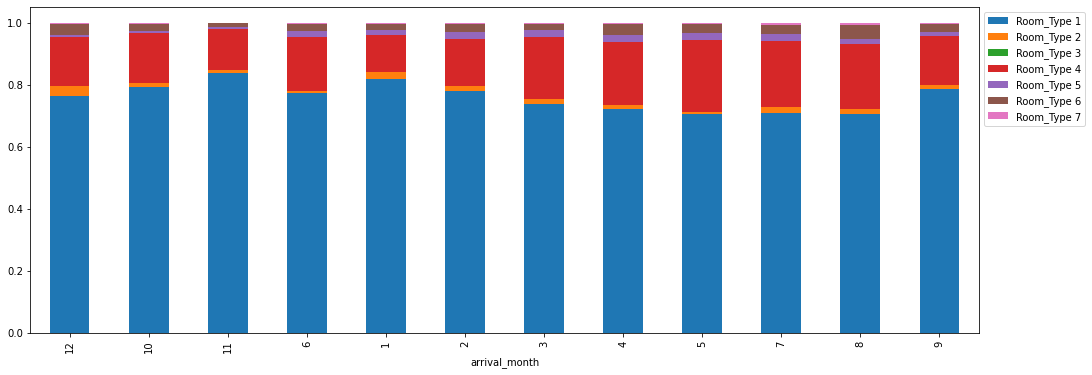

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data, "arrival_month", "room_type_reserved")

In [ ]:
*Room type 1 had the highest usage throughout the months, this was followed by room type 4.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are 14350 duplicate values in the dataset, which were dropped.
- There are no missing values in the data.
- Most of the data-types are either **int64** ,**float64** and **object**.
- 4 columns - booking_status, type of meal plan, room type reserved, and market segment type having data-types as an **object**, this means we need to convert these into suitable data-type before we feed our data into the model.




### Actions for data preparation:

* no_of_previous_cancellations and no_of_previous_bookings_not_canceled column has information related to the transaction activity of a customer and would create a bias in model if used in prediction. So, we will drop them.

### Data Preparation

In [9]:
# dropping 
data.drop(["no_of_previous_cancellations", "no_of_previous_bookings_not_canceled"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [53]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   
5             2               0                     1                  1   
6             1               0                     0                  3   
7             2               0                     0                  2   
8             2               0                     1                  3   
9             2               0                     0                  4   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1        277   
5      Not Selected                           0        Room_Type 1         48   
6       Meal Plan 1                           0        Room_Type 1         38   
7       Meal Plan 2                           0        Room_Type 1        346   
8       Meal Plan 1                           0        Room_Type 1         34   
9       Meal Plan 1                           0        Room_Type 1        133   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   
5          2018              4            11              Online   
6          2019              6            20              Online   
7          2018              9            13              Online   
8          2017             10            15              Online   
9          2019              4            19             Offline   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   
5                                     0               94.50   
6                                     0              160.00   
7                                     0              115.00   
8                                     0              107.55   
9                                     0              124.00   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       2       Canceled  
5          

<IPython.core.display.Javascript object>

In [54]:
print(data.type_of_meal_plan.value_counts())
print(data.room_type_reserved.value_counts())
print(data.market_segment_type.value_counts())


Meal Plan 1     42330
Not Selected    10072
Meal Plan 2      4516
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
Room_Type 1    42807
Room_Type 4    10413
Room_Type 6     1581
Room_Type 5      983
Room_Type 2      823
Room_Type 7      312
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           39490
Offline          13875
Corporate         2796
Complementary      536
Aviation           229
Name: market_segment_type, dtype: int64


<IPython.core.display.Javascript object>

In [69]:
replaceStruct = {"booking_status": {"Not_Canceled": 0, "Canceled": 1}}
oneHotCols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

<IPython.core.display.Javascript object>

In [70]:
data = data.replace(replaceStruct)
data = pd.get_dummies(data, columns=oneHotCols)
data.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   
5             2               0                     1                  1   
6             1               0                     0                  3   
7             2               0                     0                  2   
8             2               0                     1                  3   
9             2               0                     0                  4   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0        277          2019              7   
5                           0         48          2018              4   
6                           0         38          2019              6   
7                           0        346          2018              9   
8                           0         34          2017             10   
9                           0        133          2019              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            13               0                             0   
5            11               0                             0   
6            20               0                             0   
7            13               0                             0   
8            15               0                             0   
9            19               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               89.10   
5                                     0               94.50   
6                                     0              160.00   
7                                     0              115.00   
8                                     0              107.55   
9                                     0              124.00   

   no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 1  \
0                       0               0                              1   
1                       1               0                              0   
2                       0               1                              1   
3                       0               1                              1   
4                       2               1                              0   
5                       0               1                              0   
6                       1               0                              1   
7                       1               1                              0   
8                       1               0                              1   
9                       0               0                              1   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                              0                

<IPython.core.display.Javascript object>

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   required_car_parking_space            56926 non-null  int64  
 5   lead_time                             56926 non-null  int64  
 6   arrival_year                          56926 non-null  int64  
 7   arrival_month                         56926 non-null  int64  
 8   arrival_date                          56926 non-null  int64  
 9   repeated_guest                        56926 non-null  int64  
 10  no_of_previous_cancellations          56926 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

## Split Data

In [74]:
# defining X and y variables
X = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

<IPython.core.display.Javascript object>

In [106]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(39848, 30) (17078, 30)


<IPython.core.display.Javascript object>

In [107]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.620684
1    0.379316
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.623317
1    0.376683
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting which booking will be canceled but in reality booking would not be canceled.
2. Predicting which booking will not be canceled but in reality the booking would be canceled.

### Which case is more important? 


### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

### create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [108]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

# Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [110]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [111]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

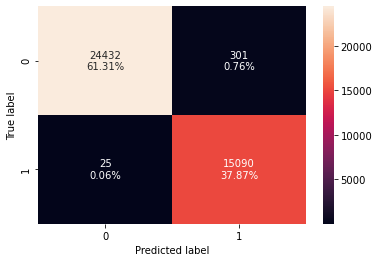

<IPython.core.display.Javascript object>

In [112]:
confusion_matrix_sklearn(model, X_train, y_train)

In [113]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 0.9983460138934833


<IPython.core.display.Javascript object>

* Model is able to classify all the data points on the training set.
* Few errors on the training set, each sample has been classified correctly.
* Decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

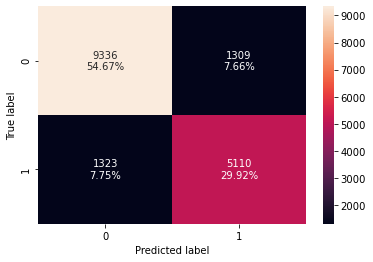

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(model, X_test, y_test)

In [116]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.794341675734494


<IPython.core.display.Javascript object>

* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Visualizing the Decision Tree

In [117]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

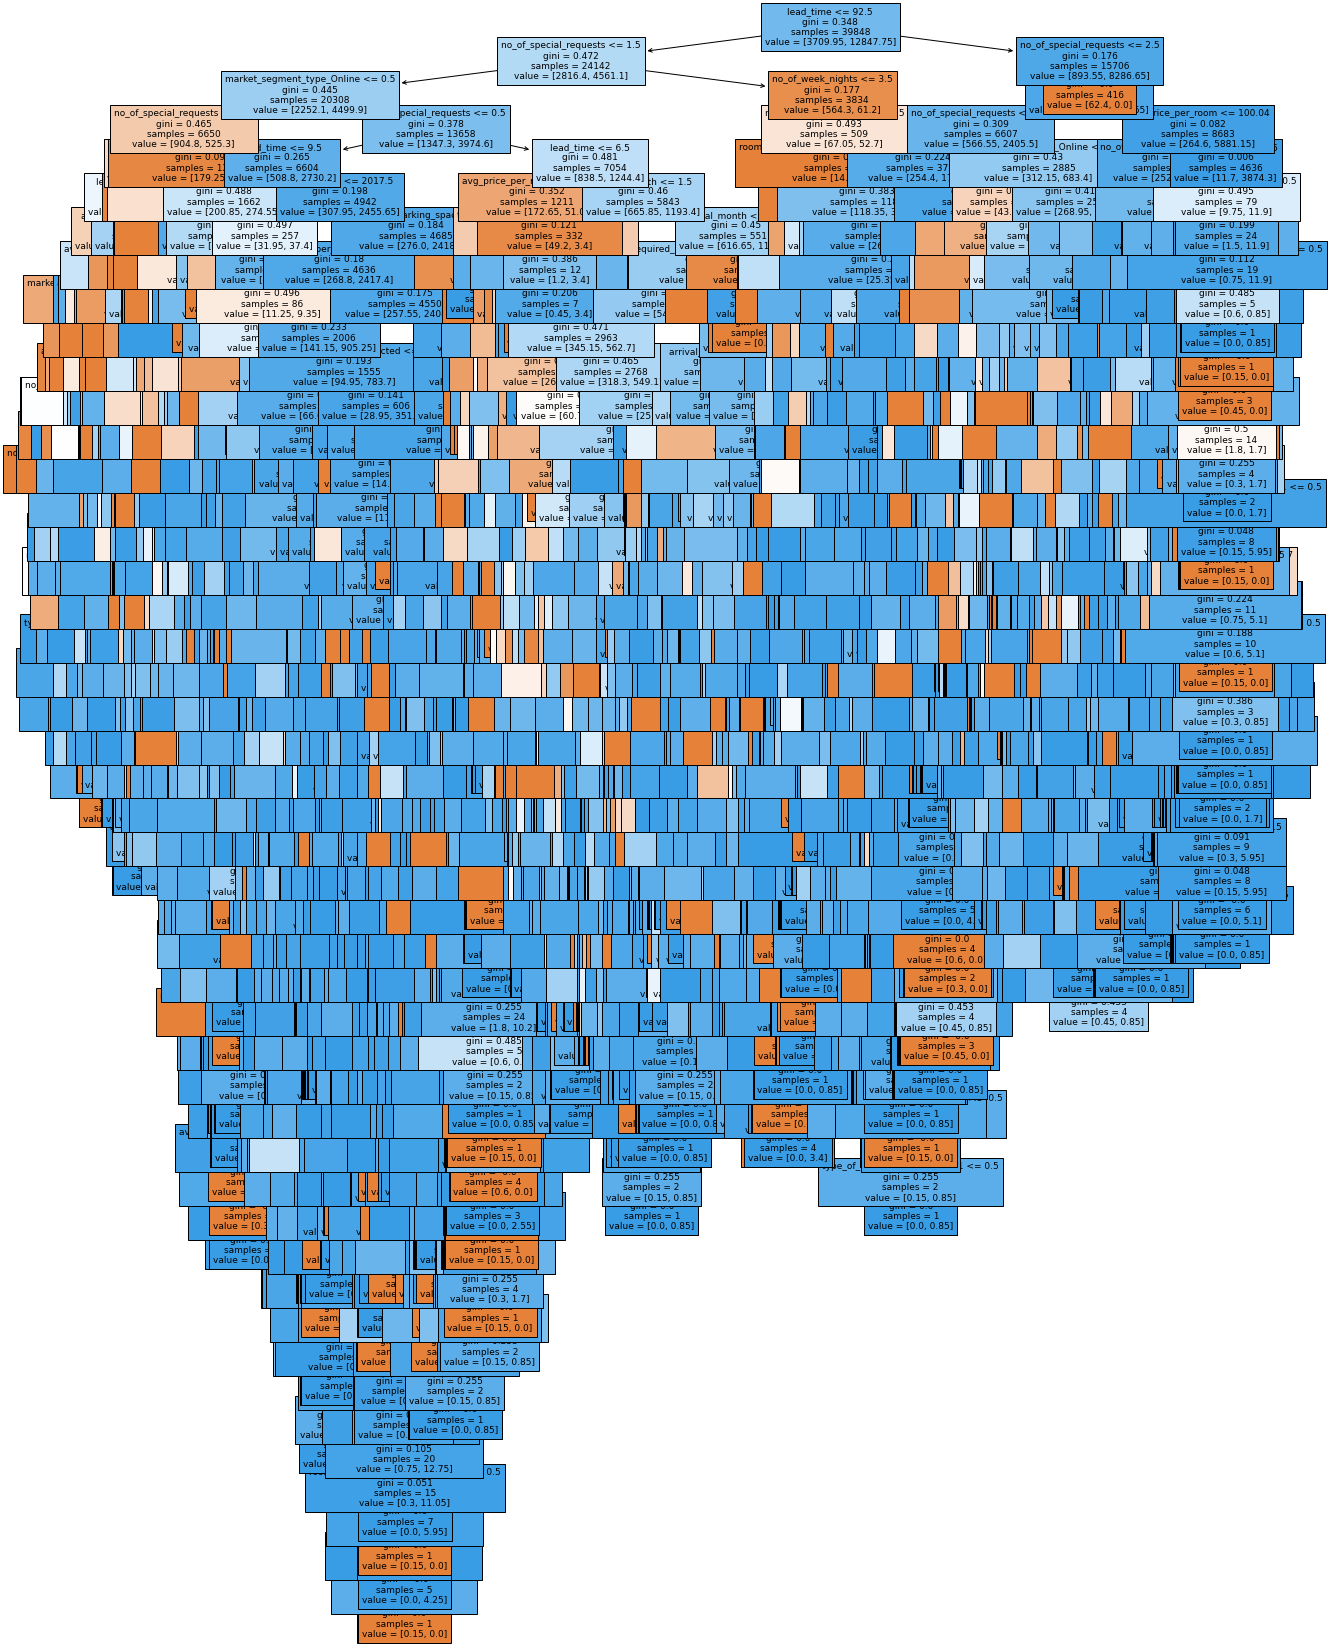

<IPython.core.display.Javascript object>

In [118]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [119]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 92.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |--- lead_time <= 36.50
|   |   |   |   |   |   |--- arrival_date <= 21.50
|   |   |   |   |   |   |   |--- no_of_week_nights <= 5.50
|   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 206.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  206.25
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- 

<IPython.core.display.Javascript object>

* The tree above is very complex and difficult to interpret.

In [120]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.299072
no_of_special_requests                0.135922
avg_price_per_room                    0.131784
arrival_date                          0.094978
arrival_month                         0.082848
market_segment_type_Online            0.070972
no_of_week_nights                     0.056246
no_of_weekend_nights                  0.034191
no_of_adults                          0.025898
arrival_year                          0.019383
required_car_parking_space            0.008535
type_of_meal_plan_Not Selected        0.005729
room_type_reserved_Room_Type 4        0.005688
room_type_reserved_Room_Type 1        0.004856
type_of_meal_plan_Meal Plan 1         0.004627
market_segment_type_Offline           0.004407
no_of_children                        0.003419
type_of_meal_plan_Meal Plan 2         0.002386
market_segment_type_Corporate         0.002099
room_type_reserved_Room_Type 5        0.001482
room_type_res

<IPython.core.display.Javascript object>

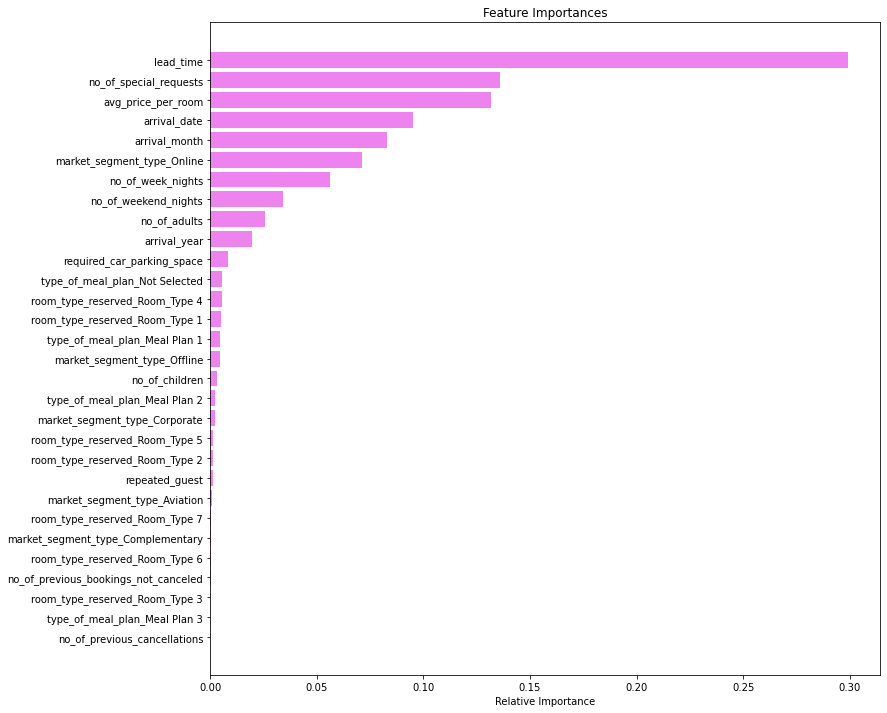

<IPython.core.display.Javascript object>

In [121]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Lead_time is the most important variable for predicting the Revenue.

### Reducing over fitting

## Using GridSearch for Hyperparameter tuning of our tree model

* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [122]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

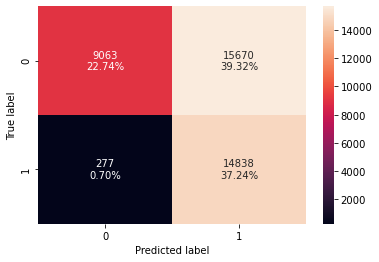

<IPython.core.display.Javascript object>

In [123]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [124]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9816738339397949


<IPython.core.display.Javascript object>

#### Checking performance on test set

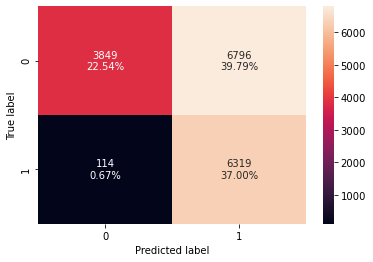

<IPython.core.display.Javascript object>

In [125]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [126]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9822788745530856


<IPython.core.display.Javascript object>

* The model is giving a generalized result now, as both train and test set are closer to each other.

## Visualizing the Decision Tree

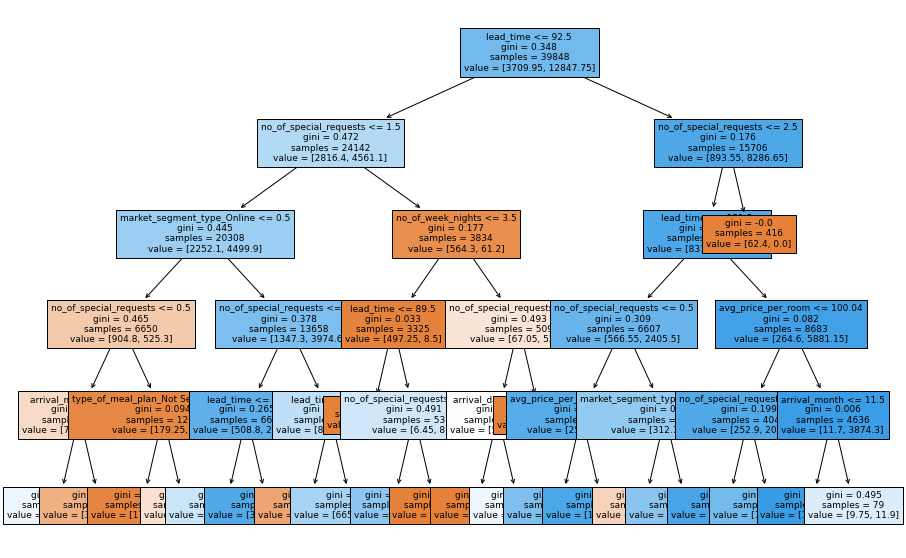

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 92.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |--- weights: [336.30, 368.90] class: 1
|   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |--- weights: [389.25, 147.05] class: 0
|   |   |   |--- no_of_special_requests >  0.50
|   |   |   |   |--- type_of_meal_plan_Not Selected <= 0.50
|   |   |   |   |   |--- weights: [174.75, 5.95] class: 0
|   |   |   |   |--- type_of_meal_plan_Not Selected >  0.50
|   |   |   |   |   |--- weights: [4.50, 3.40] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- lead_time <= 9.50
|   |   |   |   |   |--- weights: [200.85, 274.55] class: 1
|   |   |   |   |--- lead_time >  9.50
|   |   |   |   |   |--- weights: [307.95, 2455.65] class: 1
|   |   |   |--- no_of_special_requests >  0.50
|   |   |

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If a customer uses a lead time of less than 92.5days to arrive at the hotel with special request of less than 1.5 through online market segment type of less than 0.50 and the arrival month is not 6.50, then the booking will not be canceled. But if the arrival month is 8.50 then the booking will be canceled.

In [129]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                                           Imp
lead_time                             0.425881
no_of_special_requests                0.349432
market_segment_type_Online            0.158948
avg_price_per_room                    0.025360
arrival_month                         0.021858
no_of_week_nights                     0.016322
type_of_meal_plan_Not Selected        0.001125
arrival_date                          0.001075
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
market_segment_type_Aviation          0.000000
no_of_adults                          0.000000
room_type_reserved_Room_Type 1        0.000000
type_of_meal_

<IPython.core.display.Javascript object>

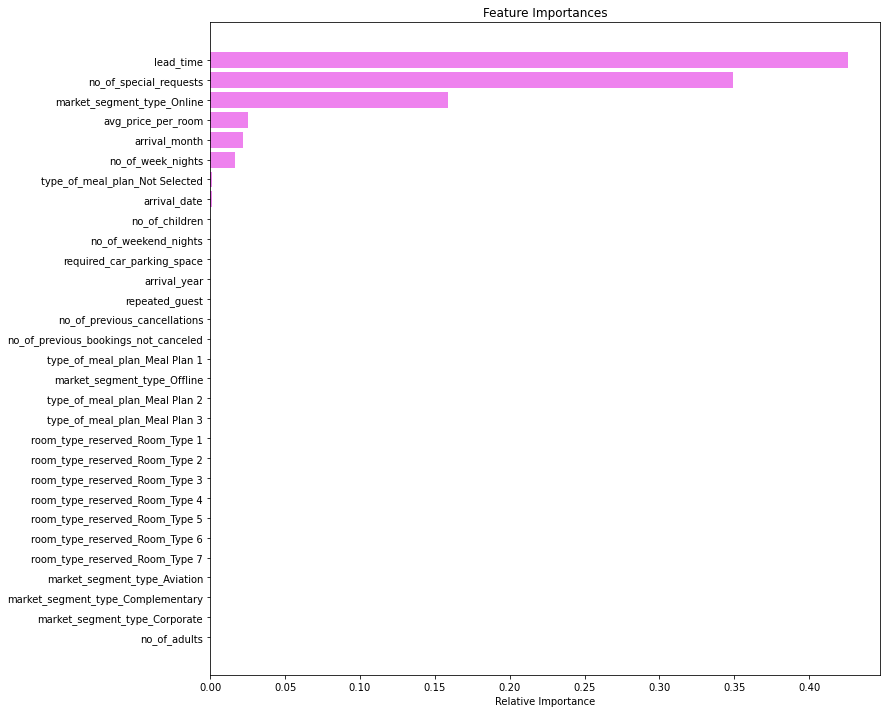

<IPython.core.display.Javascript object>

In [130]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree lead_time is the most important feature followed by no_of_special_requests.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree


In [153]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [147]:
pd.options.display.float_format = "{:.6f}".format

<IPython.core.display.Javascript object>

In [154]:
pd.DataFrame(path)

ccp_alphas  impurities
0       0.000000    0.007008
1       0.000000    0.007008
2       0.000000    0.007008
3       0.000000    0.007008
4       0.000000    0.007008
...          ...         ...
2417    0.007231    0.310477
2418    0.011616    0.322093
2419    0.016078    0.338171
2420    0.021054    0.380280
2421    0.090591    0.470871

[2422 rows x 2 columns]

<IPython.core.display.Javascript object>

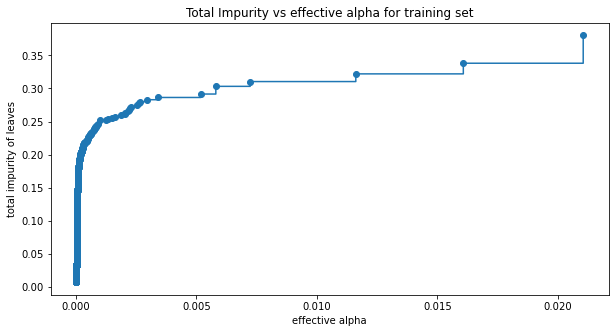

<IPython.core.display.Javascript object>

In [155]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [156]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09059131915845825


<IPython.core.display.Javascript object>

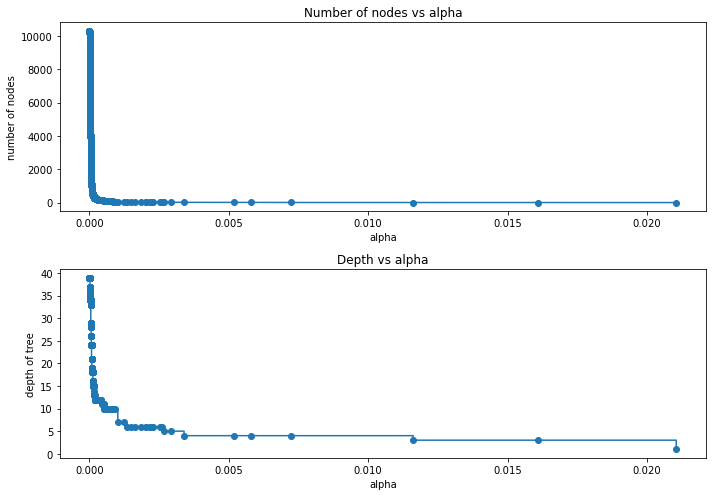

<IPython.core.display.Javascript object>

In [157]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [166]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [167]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

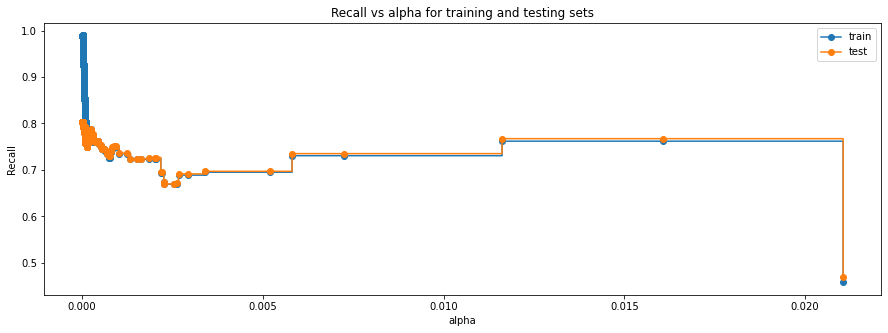

<IPython.core.display.Javascript object>

In [174]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at approximately 0.023 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.012 retaining information and getting higher recall.**

In [190]:


# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)



DecisionTreeClassifier(ccp_alpha=1.5336054785964445e-05, random_state=1)


<IPython.core.display.Javascript object>

In [173]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=1.5336054785964445e-05, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

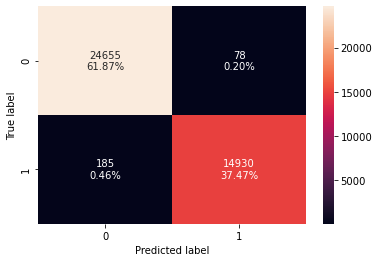

<IPython.core.display.Javascript object>

In [175]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [176]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9877605028117764


<IPython.core.display.Javascript object>

#### checking performance on test set

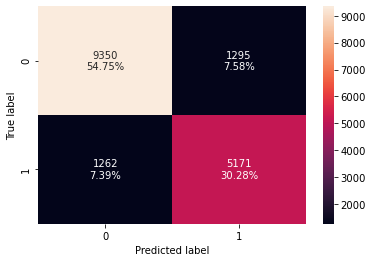

<IPython.core.display.Javascript object>

In [177]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [178]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.8038240323332815


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

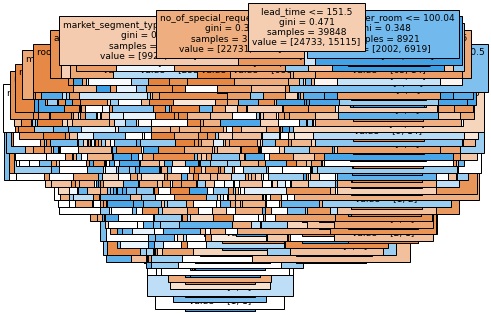

<IPython.core.display.Javascript object>

In [179]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model is not giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.012 ccp_alpha**

In [191]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.012, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

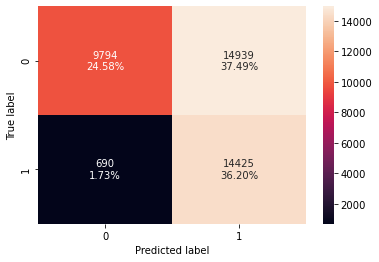

<IPython.core.display.Javascript object>

In [192]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [193]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9543499834601389


<IPython.core.display.Javascript object>

#### Checking performance on the test set

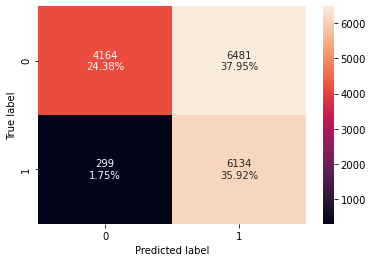

<IPython.core.display.Javascript object>

In [196]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [197]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.953520907819058


<IPython.core.display.Javascript object>

* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

### Visualizing the Decision Tree

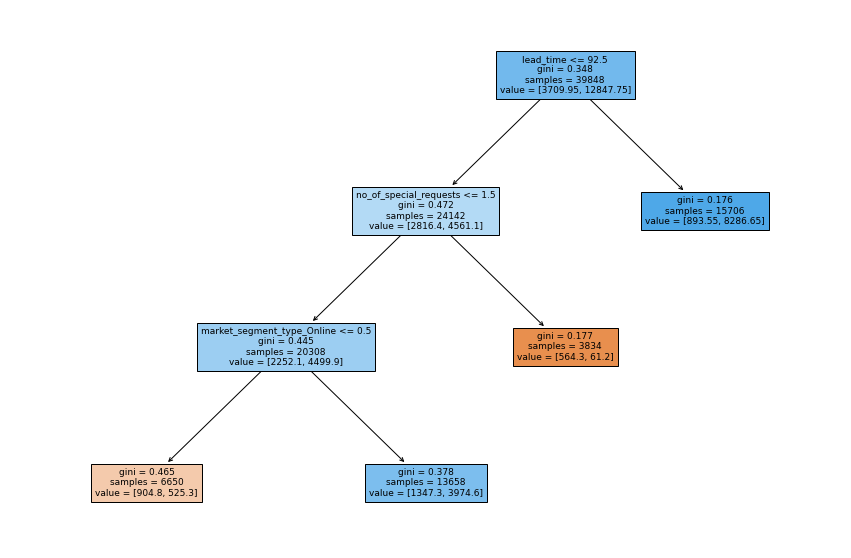

<IPython.core.display.Javascript object>

In [199]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [200]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time <= 92.50
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [904.80, 525.30] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [1347.30, 3974.60] class: 1
|   |--- no_of_special_requests >  1.50
|   |   |--- weights: [564.30, 61.20] class: 0
|--- lead_time >  92.50
|   |--- weights: [893.55, 8286.65] class: 1



<IPython.core.display.Javascript object>

In [201]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
lead_time                            0.488
no_of_special_requests               0.273
market_segment_type_Online           0.239
type_of_meal_plan_Meal Plan 3        0.000
market_segment_type_Offline          0.000
market_segment_type_Corporate        0.000
market_segment_type_Complementary    0.000
market_segment_type_Aviation         0.000
room_type_reserved_Room_Type 7       0.000
room_type_reserved_Room_Type 6       0.000
room_type_reserved_Room_Type 5       0.000
room_type_reserved_Room_Type 4       0.000
room_type_reserved_Room_Type 3       0.000
room_type_reserved_Room_Type 2       0.000
room_type_reserved_Room_Type 1       0.000
type_of_meal_plan_Not Selected       0.000
no_of_adults                         0.000
no_of_children                       0.000
type_of_meal_plan_Meal Plan 1        0.000
avg_price_per_room                   0.000
no_of_previous_bookings_not_canceled 0.000
no_of_previous_cancellations         0.000
repeated_gu

<IPython.core.display.Javascript object>

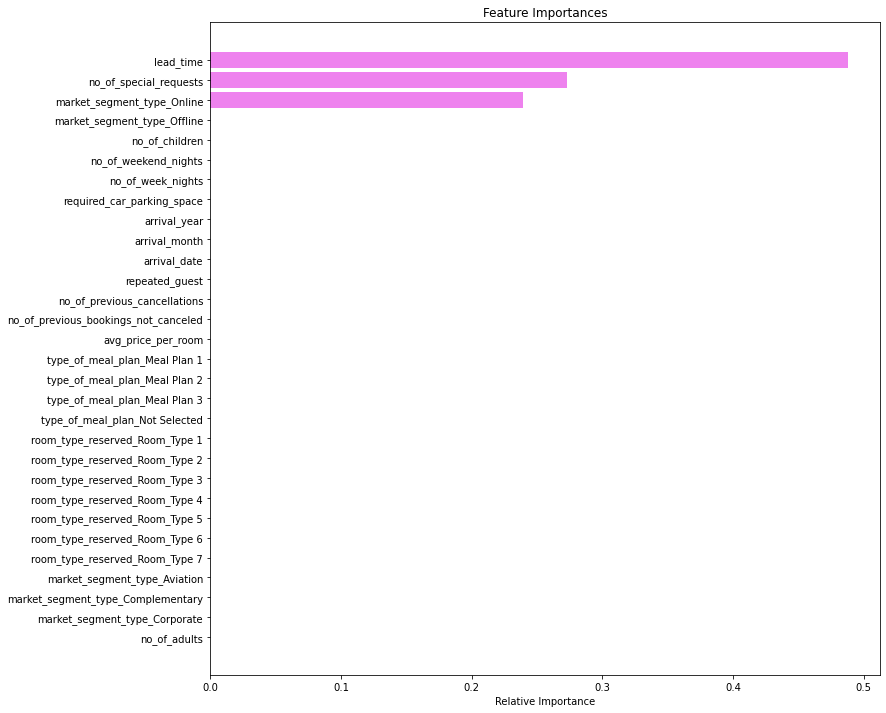

<IPython.core.display.Javascript object>

In [202]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead_time and no_of_special_request are the top two important features to predict which customer's bookings will be canceled in advance.

### Comparing all the decision tree models

In [203]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                   0.998
1                   0.982
2                   0.954

<IPython.core.display.Javascript object>

In [204]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0                  0.794
1                  0.982
2                  0.954

<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusions

- I have analyzed the factors have a high influence on booking cancellations for "Star Hotels" using different techniques with Decision Tree Classifier to build a predictive model for the hotels.
- The model built can be used to predict which bookings are going to be canceled or not canceled.
- I visualized different trees and their confusion matrix to get a better understanding of the model. 
- Lead time, no of special requests, market segment and arrival month 8.5 are the most important variable in predicting bookings that are going to be canceled or not canceled. 


### Recommendations

In formulating profitable policies for cancellations and refunds. the below can be considered.

**According to the decision tree model** -


    a) If bookings have a lead time of greater than 92.5days and an online market segment type greater than 0.50, then 
    there's a very high chance that the customer will not be arriving at the hotel, hence booking should be canceled.
    b) If bookings arrival month is 6.50 as EDA also showed that most cancelations happened within this month.

**Other Recommendations are:**
    
    1. Room type 6 had the highest cancelations, customers prefer Room 1
    2. Meal plan 2 had the highest cancelations, most customers prefer meal plan 1, which is Breakfast
    3. The busiest month is month 8, as such should be planned for.
    4. Avg. price per room for canceled booking is slightly higher, pring has to be looked into.
    5. Online market segment is mostly used by customers and has a feature of 0.50, thus if less than 0.5 bookings will not
    be canceled
    6. Repeated guest booking cancelation is approximately zero, hence repeated guest should be given gifts5.